In [4]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mat
import matplotlib.image as mpimg
import numpy as np

from z_utils.utils_base_14 import *
from z_utils.utils_7343_01 import * 

import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
from random import shuffle
import torch
from torch.utils.data import DataLoader 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from IPython.core.display import display, HTML

2000


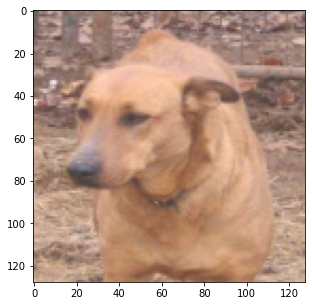

[1]


In [6]:
def show_img(open_cv_image):

    plt.figure(figsize=(5,5))
    plt.imshow(open_cv_image)
    plt.show()
class DatasetForClassify_01:
    def __init__(self,dir_name,flag):
        self.dir_name = dir_name
        self.dir_name_1 = dir_name
        self.flag = flag # 1 - показывать фотографии, 0 - не показывать
        
        
        folder_struct=self.folder2struct(dir_name)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']
        
    def adddir(self,dir_name ):
        self.dir_name_1 = dir_name
        
    def reinit_0(self  ):
        
        folder_struct=self.folder2struct(self.dir_name_1)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']
    def reinit_1(self  ):
        
        folder_struct=self.folder2struct(self.dir_name)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']


    def folder2struct(self,dir_name):
        folder = []
        for folder_ in os.listdir( dir_name):
            folder.append(dir_name+folder_+ '/')
        
        indexes=np.array(range(len(folder)))
        ind_all=[]
        w_array=[]
        for i in indexes:
                   
            files_i = self.photo_shuffle(str(folder[i ]))
            ind_all.append(np.array(files_i))
            w_array.append(len(files_i))
        ind_all=np.array(ind_all)
        w_array=np.array(w_array)        
        l_=sum(w_array)
        folder_struct = {'folder':folder,'w_array':w_array,'l_' : l_,'ind_all' : ind_all}
        return folder_struct

        
        
    def __len__(self):
        
         
        return min(10000,self.l_)


    #Создание списка с фото+шаффл
    def photo_shuffle(self,folder_ ):
        files = []
        for file in os.listdir(folder_   + '/'):
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
                files.append(file)
        shuffle(files)
        #print(self.folder[number])
        return files
    def downscale_2(self,img):
        img = img.astype(np.uint16)
        img = img[:, 0::2] + img[:, 1::2]
        img = img[0::2, :] + img[1::2, :]
        img >>= 2
        return img.astype(np.float)    
    #Ресайзинг
    def resize(self,pimage):
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
         
        bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB ) 
        if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :
             
            resize_image = self.downscale_2(bw_)
            #resize_image =  bw_ 
        else:
            resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)
         
         
        return resize_image
    
    def random_sample_file(self ):
        i_folder=random.sample(range(len(self.folder)), 1)
        #print('i_folder',i_folder[0])
        i_file=random.sample(range( self.w_array[i_folder[0]]), 1)
        #print('i_file',i_file[0])
        #print('self.folder[i_folder[0]]',self.folder[i_folder[0]])
        file_temp=self.folder[i_folder[0]]+self.ind_all[i_folder[0]][i_file[0]]
        return i_folder,file_temp

    def __getitem__(self,idx):

        i_folder,file_temp=self.random_sample_file()
         
            
        anchor = self.resize(file_temp)
        

        return {'Anchor':anchor/255,
                 
                
               'label': np.array([i_folder[0]])}
###################################################
dataset1 =DatasetForClassify_01('dog vs cat/dataset/test_set/',0) 
dataloader = DataLoader(dataset1, batch_size=5)
l_=dataset1.l_
print(l_)
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
show_img(Anchor[:,:,:])
 
label_=batch['label'][0].numpy()  
print(label_)

In [23]:
from zz.gan_struct_04a import *
#from DiffuseMap_03b import *
#№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№
class conv_simple_features_01(Layer_06):
    def __init__(self, canal_init=512, device = None, L1 = 0., L2 = 0.,show=0):
        super(conv_simple_features_01, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
                
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_conv_31 = Conv2d(canal_init,int(canal_init/2), kernel_size=(2, 2),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        self.add_module('conv00', _layer_conv_31) 
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_conv_32 = Conv2d(int(canal_init/2),int(canal_init/2), kernel_size=(2,2),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        
        self.add_module('conv01', _layer_conv_32) 
        _layer_conv_33 = Conv2d(int(canal_init/2),int(canal_init/4), kernel_size=(2,2),
                            stride=(1, 1), padding = (1, 1), padding_mode = 'zeros', bias = True)
          
        
        self.add_module('conv02', _layer_conv_33) 
        _layer_pooling_1 = MaxPool2d(kernel_size=(2, 2)) #Сжимаем канальность
        self.add_module('Pool_00', _layer_pooling_1) 
        self.add_module('fltn_1', Flatten( )) #Делаем один выходной канал

        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, scatch0):
        im_01_dwnsmpl=self.conv00(scatch0)
        im_01_dwnsmpl=self.activation_LeakyReLU(im_01_dwnsmpl)
        if self.show:
            print('im_01_dwnsmpl',im_01_dwnsmpl.shape)    
         
        im_03_dwnsmpl=self.conv02(im_01_dwnsmpl)
        im_03_dwnsmpl=self.Pool_00(im_03_dwnsmpl) 
        im_03_dwnsmpl=self.activation_LeakyReLU(im_03_dwnsmpl)
        if self.show:
            print('im_03_dwnsmpl',im_03_dwnsmpl.shape)    
        vect_00=self.fltn_1(im_03_dwnsmpl)
        if self.show:
            print('vect_00',vect_00.shape)   
        return vect_00
#№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№
class conv_simple_features_02(Layer_06):
    def __init__(self, canal_init=512, device = None, L1 = 0., L2 = 0.,show=0):
        super(conv_simple_features_02, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
                
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_conv_31 = Conv2d(canal_init,int(canal_init/2), kernel_size=(2, 2),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        self.add_module('conv00', _layer_conv_31) 
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_conv_32 = Conv2d(int(canal_init/2),int(canal_init/2), kernel_size=(2,2),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        
        self.add_module('conv01', _layer_conv_32) 
        _layer_conv_33 = Conv2d(int(canal_init/2),int(canal_init/4), kernel_size=(2,2),
                            stride=(1, 1), padding = (1, 1), padding_mode = 'zeros', bias = True)
          
        
        self.add_module('conv02', _layer_conv_33) 
        _layer_pooling_1 = MaxPool2d(kernel_size=(2, 2))  
        self.add_module('Pool_00', _layer_pooling_1) 
        self.add_module('fltn_1', Flatten( ))

        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, scatch0):
        im_01_dwnsmpl=self.conv00(scatch0)
        im_01_dwnsmpl=self.activation_LeakyReLU(im_01_dwnsmpl)
        if self.show:
            print('im_01_dwnsmpl',im_01_dwnsmpl.shape)    
        im_02_dwnsmpl=self.conv01(im_01_dwnsmpl)
        im_02_dwnsmpl=self.activation_LeakyReLU(im_02_dwnsmpl)
        if self.show:
            print('im_02_dwnsmpl',im_02_dwnsmpl.shape)    
        im_03_dwnsmpl=self.conv02(im_02_dwnsmpl)
        im_03_dwnsmpl=self.Pool_00(im_03_dwnsmpl) 
        im_03_dwnsmpl=self.activation_LeakyReLU(im_03_dwnsmpl)
        if self.show:
            print('im_03_dwnsmpl',im_03_dwnsmpl.shape)    
        vect_00=self.fltn_1(im_03_dwnsmpl)
        if self.show:
            print('vect_00',vect_00.shape)   
        return vect_00
################################################
################################################3
class fully_connect_modul_300(Layer_06):
    def __init__(self,  size_,device = None, L1 = 0., L2 = 0.,   show=0):
        super(fully_connect_modul_300, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
             
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_D01 = Linear(size_[0], size_[1], bias = True)
        self.add_module('D01', _layer_D01)
        _layer_Dropout01 = Dropout(0.5)
        _layer_batch_norm_3 = BatchNorm1d(size_[1])
        self.add_module('Dropout01', _layer_Dropout01) 
        self.add_module('layer_batch_norm',  _layer_batch_norm_3) 
        _layer_D02 = Linear(size_[1], size_[2], bias = True)
        self.add_module('D02', _layer_D02)
        _layer_D03 = Linear(size_[2], size_[3], bias = True)
        self.add_module('D03', _layer_D03)
       
        
        
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
        #########################
        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, vect_00):
        vect_01=self.D01(vect_00)        
        vect_01=self.Dropout01(vect_01)
        vect_01=self.activation_LeakyReLU(vect_01)
        if self.show:
            print('vect_01',vect_01.shape) 
        vect_01=self.layer_batch_norm(vect_01)
        if self.show:
            print('vect_01 layer_batch_norm',vect_01.shape) 
        vect_02=self.D02(vect_01) 
        vect_02=self.activation_LeakyReLU(vect_02)
        if self.show:
            print('vect_02',vect_02.shape)    
        vect_03=self.D03(vect_02) 
        
         
        if self.show:
            print('vect_03',vect_03.shape)         
        return vect_03

################################################3
class Normalization(nn.Module):
    def __init__(self,  device):
        super(Normalization, self).__init__()
        self.device =device
        cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]) 
        cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]) 
        # .view the mean and std to make them [C x 1 x 1] so that they can
        # directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.FloatTensor(cnn_normalization_mean).view(-1, 1, 1).to(self.device)
        #self.mean = torch.tensor(mean)
        #print(self.mean)
        #self.std = torch.tensor(std).view(-1, 1, 1) 
        self.std = torch.FloatTensor(cnn_normalization_std).view(-1, 1, 1).to(self.device)
        #print(self.std)
 
    def forward(self, img):
        #Получает на вход фотографию. На выходе такой же формат+размер, но другие данные. Также увеличивает канальность с 1 до 3
        return ((img - self.mean) / self.std).to(self.device)
###########################################################################################3
class TL_003_mehanit_onnx(Layer_06):
    def __init__(self, imageSize,  last_activate, L1 = 0., L2 = 0.,device = None,numclasses=10,show=0 ):
        super(TL_003_mehanit_onnx, self).__init__( (imageSize[0],imageSize[1],1)   )    

        #self.class_name = str(self.__class__).split(".")[-1].split("'")[0]
        self.class_name = self.__class__.__name__
        self.last_activate = last_activate
        self.cannal_in= imageSize[2]
         
        self.imageSize = imageSize
        self.regularizer = Regularizer(L1, L2)
        self.show=show
        self.L1=L1
        self.L2=L2
        self.numclasses=numclasses 
        self.criterion_tml = torch.nn.TripletMarginLoss(margin=1.0, p=2)
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")

        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        ##############
        self._layer_permut_channelfirst = Lambda(lambda x:  x.permute((0, 3, 1, 2)))
        self._layer_permut_channellast = Lambda(lambda x:  x.permute((0, 2, 3, 1)))
        self.vgg_normalization = Normalization( self.device) #Первое делаем нормализиацию.
        vgg_conv = torchvision.models.vgg19(pretrained=0)##конв часть+ векторизация
        vgg_conv.load_state_dict(torch.load('vgg19-dcbb9e9d.pth', map_location=self.device))
        self.vgg_conv= vgg_conv.features.to(self.device)# только  конв часть
        for param in self.vgg_conv.parameters():
            param.requires_grad = False
        self.conv2Dfeatures_00=conv_simple_features_01(512,device,L1 ,L2,self.show) 
        self.conv2Dfeatures_01=conv_simple_features_02(512,device,L1 ,L2,self.show) 
        self.conv2Dfeatures_02=conv_simple_features_02(256,device,L1 ,L2,self.show) 
        self.conv2Dfeatures_03=conv_simple_features_02(512,device,L1 ,L2,self.show) 
        self.fully_connect_modul_00=fully_connect_modul_300([512,128,64,32],device,L1 ,L2,self.show)
        self.fully_connect_modul_01=fully_connect_modul_300([384,128,64,32],device,L1 ,L2,self.show)
        self.fully_connect_modul_02=fully_connect_modul_300([192,100,32,1],device,L1 ,L2,self.show)
        
        ###################
         
        
        _layer_SfTMax = Softmax(dim = -1)
        self.add_module('SfTMax', _layer_SfTMax)  
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
 
        self.to(self.device)
        
        self.reset_parameters()
    #####################################################
    def forward(self, scatch ):
        class _type_input(Enum):
            is_torch_tensor = 0
            is_numpy = 1
            is_list = 2
        print('scatch',scatch)
        
           
        x_input = scatch
        
        _t_input = []
        _x_input = []
        for x in (x_input,x_input):
            if isinstance(x, (torch.Tensor)):
                _t_input.append(_type_input.is_torch_tensor)
                _x_input.append(x)
            elif isinstance(x, (np.ndarray)):
                _t_input.append(_type_input.is_numpy)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            elif isinstance(x, (list, tuple)):
                _t_input.append(_type_input.is_list)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            else:
                raise Exception('Invalid type input')

        _x_input = tuple(_x_input)
        _t_input = tuple(_t_input)
        #print('_x_input[0]',_x_input[0])
        
        #ПредПроцессинг
        scatch = self._contiguous(_x_input[0]) #Меняет формат тензора. Функция contiguous. Формат данных тот же. Бесползеная строка
        #scatch = _x_input[0].contiguous()
        dec_0=self.predprocessing(scatch) #Предпроцессинг взятый из ВГГ. Меняет канальность и делает нормализацию фотографии
        #Также в нормализации увеличивается канальность с 1 до 3.
        if self.show:
            print('dec_0=self.predprocessing(scatch)',dec_0.shape)
        
        ##### STYLE  ###################################### ТЕКСТУРА
        #Сначала делаем ВГГ конлюцию, получаем словарь с разными слоями. Далее работаем с каждым слоем из ВГГ
        dec_1=self.get_features(dec_0) #конволюциооный слой из ВГГ. На выходе имеем словарь с каждым описанным слоем.
        #########################
        d_0=dec_1['conv5_1'] #Забираем только последний слой
        if self.show:
            print('d_0=dec_1[conv5_1]',d_0.shape)
        d_01=self.conv2Dfeatures_00(d_0) #Конволюционный слой от Михаила. Конв-релу-Конв-релу-Флаттен. На выход [2,512]
        if self.show:
            print('d_01=self.conv2Dfeatures_00(d_0)',d_01.shape)
        d_02=self.fully_connect_modul_00(d_01) #Полносвязное линейное преобразование, уменьашем канальность с 512-32 [2,32]
        if self.show:
            print('d_02=self.fully_connect_modul_00(d_01)',d_02.shape)
        ##############
        #Берем предпоследний слой из словаря. Делаем конвалюции.
        d_1=dec_1['conv4_1']
        if self.show:
            print('d_1=dec_1[conv4_1]',d_1.shape)
        d_11=self.conv2Dfeatures_01(d_1)
        if self.show:
            print('d_11=self.conv2Dfeatures_01(d_0)',d_11.shape)
        #На выходе Тензор [2,128]
        #№№№№№№№№№№№№№№№№№№    
        #Берем 3 слой из словаря. Делаем конвалюции.
        d_2=dec_1['conv3_1']
        if self.show:
            print('d_2=dec_1[conv4_1]',d_2.shape)
        d_21=self.conv2Dfeatures_02(d_2)
        if self.show:
            print('d_21=self.conv2Dfeatures_01(d_0)',d_21.shape)
        #На выходе Тензор [2,256]
        #№№№№№№№№№№№№№№№№№№ 
        d_30=torch.cat((d_11 ,d_21   ),axis=1)
        #Торч.Кет для объединения двух тензоров вокруг одной оси. Получаем тензор [2,384]
        if self.show:
            print('d_30=torch.cat((d_11 ,d_21   ),axis=1)',d_30.shape)
        d_31=self.fully_connect_modul_01(d_30) #И сделали полносвязное линейное преобзование
        if self.show:
            print('d_31=self.fully_connect_modul_01(d_30)',d_31.shape)
        #На выходе Тензор [2,32]
        #########################
        #Тут мы складываем тензор из первой части и тензор из 2 и 3 части. ВЫХОДНАЯ ТЕКСТУРА
        d_40_style_vector=torch.cat((d_02 ,d_31  ),axis=1)
        if self.show:
            print('d_40_style_vector',d_40_style_vector.shape)
        #На выходе Тензор [2,64]
        ##### content  ###################################### Михаил сказал КОНТЕНТ
        #Опять берем предпоследний слой из словаря
        d_5=dec_1['conv4_2']
        if self.show:
            print('d_5=dec_1[conv4_2]',d_5.shape)
        d_51_structure_vector=self.conv2Dfeatures_03(d_5)
        if self.show:
            print('d_51_structure_vector',d_51_structure_vector.shape)  
        #Делаем с ним конволюции и получаем на выходе [2, 128].
        ##########  final  ################################3
        #Складываем вектора КОНТЕНТА и ТЕКСТУРЫ
        d_52=torch.cat((d_40_style_vector ,d_51_structure_vector  ),axis=1)
        if self.show:
            print('d_52',d_52.shape) 
        d_53=self.fully_connect_modul_02(d_52) #Делаем полносвязный линейный модуль
        d_54=self.Sgmd(d_53) #И с помощью сигмоиды выбор
        if self.show:
            print('d_54',d_54.shape) 
            
            
 
        x = d_54
        x = self._contiguous(x)

        ###################    

        if _type_input.is_torch_tensor in _t_input:
            pass
        elif _type_input.is_numpy in _t_input:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy()
            else:
                x = x.detach().numpy()
        else:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy().tolist()
            else:
                x = x.detach().numpy().tolist()

        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return x 
    
    #Вся часть связанная с ВГГ для получения на выходе словаря со слоями
    def _get_regularizer(self):
        return self.regularizer
#################################################################
    def predprocessing(self, x ):
        x_1=self._layer_permut_channelfirst(x)
        x_2=self.vgg_normalization(x_1)
        return x_2
    def apply_vgg_to_1_tevsor(self, x_input ):
        x_1=self.predprocessing(x_input)
        x_2=self.vgg_conv(x_1)
        return x_2
    def get_features(self,image,   layers=None):
        """ Run an image forward through a model and get the features for 
            a set of layers. Default layers are for VGGNet matching Gatys et al (2016)
        """
        model=self.vgg_conv
        ## TODO: Complete mapping layer names of PyTorch's VGGNet to names from the paper
        ## Need the layers for the content and style representations of an image
        if layers is None:
            layers = {'0': 'conv1_1',
                      '5': 'conv2_1', 
                      '10': 'conv3_1', #Текстуры
                      '19': 'conv4_1', #Текстуры
                      '21': 'conv4_2', ## content representation
                      '28': 'conv5_1'} #Текстуры


        ## -- do not need to change the code below this line -- ##
        features = {}
        x = image
        # model._modules is a dictionary holding each module in the model
        for name, layer in model._modules.items():
            #print( name)
            #print(isinstance(x, (torch.Tensor)))
            
            x = layer(x)
            if name in layers:
                features[layers[name]] = x

        return features

###################################################################################################
      
    def _get_regularizer(self):
        return self.regularizer

###################################################################
    def loss_batch_01(self,dsrmn_model, xb, yb,   opt=None):
#            def cross_entropy(pred, soft_targets):
#                return -torch.log(torch.mean(torch.sum(soft_targets * pred, 1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))
#            def l2_norm_diff(pred, soft_targets):
#                return  torch.sqrt(torch.mean(torch.sum((soft_targets - pred )**2,-1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))

        #print(xb[0].shape)
        
        pred = self.forward(xb)
          

        if isinstance(pred, tuple):
            pred0 = pred[0]
            del pred
        else:
            pred0 = pred
        loss=0
        
        #loss_mse= self._criterion(pred0, yb) 
        #print(pred0.shape)
        #print(yb.shape)
        MSELoss=nn.MSELoss(reduction='mean') 
        #print(pred0.shape,  yb.shape)
        loss_mse= MSELoss(pred0, yb) 
         
        
        loss +=1.1*loss_mse 
       
        #print(self.loss_vgg_1_bw(pred0, yb),self._criterion(pred0, yb),self.MSELoss( dscrm_tenzor,0*dscrm_tenzor))
         
        
        #loss+=  2.1*loss_mse 
        #loss = loss_func(pred0, yb)
        #loss = cross_entropy(pred, yb)

        del pred0

        #_, predicted = torch.max(pred.data, dim = 1)
        #_, ind_target = torch.max(yb, dim = 1)
        #correct = (predicted == ind_target).sum().item()
        #acc = correct / len(yb) #.size(0)

        _regularizer = self._get_regularizer()

        reg_loss = 0
        for param in self.parameters():
            reg_loss += _regularizer(param)

        loss += reg_loss

        if (opt is not None)  :
            with torch.no_grad():

                opt.zero_grad()

                loss.backward()

                opt.step()

        self.count+=1
        if self.count  %3==0:
            print("*", end='')

        loss_item = loss.item()

        del loss
        del reg_loss

        return loss_item, len(yb)#, acc

    
################################################################
    def fit_dataloader_00(self, dscrm_model,loader,   epochs = 1, validation_loader = None):
        #_criterion = nn.CrossEntropyLoss(reduction='mean')
        #_optimizer = optim.AdamW(self.parameters())
        #_optimizer = optim.Adam(self.parameters(), lr = 0.00001)#, eps=0.0)
        if (self._criterion is None): # or not isinstance(self._criterion, nn._Loss):
            raise Exception("Loss-function is not select!")

        if (self._optimizer is None) or not isinstance(self._optimizer, optim.Optimizer):
            raise Exception("Optimizer is not select!")

#        _criterion = nn.MSELoss(reduction='mean')
#        _optimizer = optim.SGD(self.parameters(), lr=0.001, momentum=0.2)


         
            
            
        history = History()
        self.count=0
        for epoch in range(epochs):
            self._optimizer.zero_grad()
            
            print("Epoch {0}/{1}".format(epoch, epochs), end='')
            
            self.train()
            ########################################3
             
            
            ### train mode ###
            print("[", end='')
            losses=[]
            nums=[]
            for s in loader:
                
 
                
                train_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['label'].numpy()).to(self.device)  
                                        )
                
                 
                 
                images_Anchor=train_ds.tensors[0] 
                 
                label_=train_ds.tensors[1]
                 
                print('images_Anchor',images_Anchor)
                
                
                

                losses_, nums_   =   self.loss_batch_01(dscrm_model, \
                                                   images_Anchor,\
                                                    label_,  self._optimizer)                                                                                                       


                losses.append(losses_)
                nums.append(nums_ )
                 
                
            print("]", end='')


            sum_nums = np.sum(nums)
            loss = np.sum(np.multiply(losses, nums)) / sum_nums
            ######################################
             
            ### test mode ###
            if validation_loader is not None:
                 


                self.eval()
                
                 
                print("[", end='')
                losses=[]
                nums=[]
                for s in validation_loader:
                #s = next(iter(loader))
                
                    val_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['class_'].numpy()).to(self.device)  
 
                                        )
                

                    images_Anchor=val_ds.tensors[0] 

                    class_=val_ds.tensors[1]
                     
                
                 
                
                     
                
                

  
                      
                    
                                                                                                                         

                    losses_, nums_   =  \
                    self.loss_batch_01( dscrm_model,\
                           (images_Anchor ,images_Anchor ),\
                           class_, self._optimizer)      

                    losses.append(losses_)
                    nums.append(nums_ )
                print("]", end='')


                sum_nums = np.sum(nums)
                val_loss = np.sum(np.multiply(losses, nums)) / sum_nums
                    #acc = np.sum(np.multiply(accs, nums)) / sum_nums
                #################################################
                history.add_epoch_values(epoch, {'loss': loss, 'val_loss': val_loss})
                
                print(' - Loss: {:.6f}'.format(loss), end='')
                print(' - Test-loss: {:.6f}'.format(val_loss), end='')
            else:
                history.add_epoch_values(epoch, {'loss': loss })
                print(' - Loss: {:.6f}'.format(loss), end='')
                
            print("")
            
 
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return history
    
    
    
    
#from DiffuseMap_03b import *
IMAGE_SIZE = [128, 128, 3] 
TL_001 = TL_003_mehanit_onnx(imageSize = IMAGE_SIZE, last_activate='linear', device='cuda',numclasses=670 ,show=1)
TL_001.compile(criterion='000', optimizer='adam', lr=0.0001, momentum=0.5) 
#TL_001.load_state('TL_01.pt')
TL_001.load_state('cat_dogs.pt')      
TL_001.eval()
TL_001.summary() 


Loading preset weights... Ok.
scatch tensor([[[[0.9892],
          [0.2064],
          [0.3880],
          ...,
          [0.3730],
          [0.2977],
          [0.1081]],

         [[0.7124],
          [0.3714],
          [0.2828],
          ...,
          [0.0576],
          [0.2170],
          [0.6401]],

         [[0.8288],
          [0.9301],
          [0.2661],
          ...,
          [0.1401],
          [0.0699],
          [0.2977]],

         ...,

         [[0.9100],
          [0.4295],
          [0.9184],
          ...,
          [0.0866],
          [0.8384],
          [0.1409]],

         [[0.9437],
          [0.6882],
          [0.2860],
          ...,
          [0.4783],
          [0.5511],
          [0.9676]],

         [[0.7154],
          [0.6084],
          [0.0030],
          ...,
          [0.1600],
          [0.6739],
          [0.8087]]],


        [[[0.2124],
          [0.7707],
          [0.8935],
          ...,
          [0.9273],
          [0.7417],
        

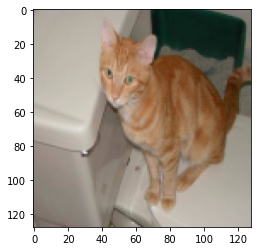

scatch (1, 128, 128, 3)
0.005611971


'This is Cat'

In [17]:
def resize(pimage):
    stream = open(pimage, "rb")
    bytes = bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
    stream.close()

    bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB ) 
    if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :

        resize_image = self.downscale_2(bw_)
        #resize_image =  bw_ 
    else:
        resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)


    return resize_image/255

def check_nn(path):
    files = []
    for file in os.listdir(path):
        files.append(path+file)
    shuffle(files)
    resize_image = resize(files[0])
    plt.imshow(resize_image)
    plt.show()
    value = TL_001(np.expand_dims(resize_image,0))[0][0]
    print(value)
    if value < 0.5:
        return 'This is Cat'
    else:
        return 'This is Dog'
check_nn('dog vs cat/dataset/test/')

In [18]:
min_loss=10


dataset1 =DatasetForClassify_01('dog vs cat/dataset/test_set/',0) 
dataloader = DataLoader(dataset1, batch_size=5)        


for gn in range(1000):
    H =TL_001.fit_dataloader_00(  \
                None,loader=dataloader,   epochs = 5, validation_loader = None)
    plt.figure(figsize=(5,5))
    plt.axes().set_aspect('equal')
    plt.plot(H.history['loss'], label='training loss')
    #plt.plot(H.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()
    loss_=H.history['loss'][-1]
    if loss_<min_loss:
        TL_001.save_state('cat_dogs.pt')
           
         
        print("loss:  ",loss_)
        min_loss=loss_
    dataset1 =DatasetForClassify_01('dog vs cat/dataset/training_set/',0) 
    dataloader = DataLoader(dataset1, batch_size=5)        
     
     

Epoch 0/5[images_Anchor tensor([[[[0.0980, 0.0824, 0.0510],
          [0.0980, 0.0863, 0.0549],
          [0.1020, 0.0902, 0.0588],
          ...,
          [0.2941, 0.2118, 0.0902],
          [0.2353, 0.1765, 0.0745],
          [0.2118, 0.1686, 0.0745]],

         [[0.0784, 0.0824, 0.0588],
          [0.0745, 0.0784, 0.0549],
          [0.0706, 0.0745, 0.0549],
          ...,
          [0.2667, 0.1569, 0.0588],
          [0.1804, 0.0980, 0.0235],
          [0.1608, 0.1020, 0.0431]],

         [[0.0941, 0.0863, 0.0588],
          [0.0980, 0.0863, 0.0588],
          [0.0863, 0.0784, 0.0510],
          ...,
          [0.3216, 0.1804, 0.0706],
          [0.2941, 0.1647, 0.0745],
          [0.3843, 0.2627, 0.1922]],

         ...,

         [[0.1647, 0.1412, 0.1373],
          [0.1490, 0.1294, 0.1216],
          [0.1490, 0.1255, 0.1216],
          ...,
          [0.3804, 0.3255, 0.2902],
          [0.3765, 0.3216, 0.2863],
          [0.3333, 0.2784, 0.2431]],

         [[0.1765, 0.1490, 0.

images_Anchor tensor([[[[0.9804, 0.7529, 0.6392],
          [0.9843, 0.7490, 0.6392],
          [0.9882, 0.7451, 0.6353],
          ...,
          [0.8353, 0.4706, 0.2902],
          [0.7922, 0.5294, 0.3529],
          [0.9059, 0.7529, 0.5882]],

         [[0.9804, 0.7608, 0.6510],
          [0.9843, 0.7608, 0.6510],
          [0.9765, 0.7412, 0.6353],
          ...,
          [0.8392, 0.4863, 0.3059],
          [0.7882, 0.5098, 0.3373],
          [0.8745, 0.7020, 0.5412]],

         [[0.9765, 0.7686, 0.6667],
          [0.9686, 0.7529, 0.6549],
          [0.9843, 0.7569, 0.6667],
          ...,
          [0.8353, 0.5020, 0.3216],
          [0.7922, 0.4980, 0.3255],
          [0.8275, 0.6157, 0.4471]],

         ...,

         [[0.4353, 0.5725, 0.7412],
          [0.3765, 0.5137, 0.6784],
          [0.3922, 0.5176, 0.6863],
          ...,
          [0.2941, 0.4000, 0.5608],
          [0.2745, 0.3843, 0.5412],
          [0.2784, 0.3529, 0.5216]],

         [[0.4235, 0.5490, 0.7255],
   

images_Anchor tensor([[[[0.4353, 0.3804, 0.2745],
          [0.4157, 0.3608, 0.2549],
          [0.4078, 0.3529, 0.2471],
          ...,
          [0.4980, 0.4941, 0.4784],
          [0.5020, 0.4980, 0.4824],
          [0.5020, 0.4980, 0.4824]],

         [[0.4314, 0.3765, 0.2706],
          [0.4118, 0.3569, 0.2510],
          [0.4078, 0.3529, 0.2471],
          ...,
          [0.4863, 0.4824, 0.4667],
          [0.4863, 0.4824, 0.4667],
          [0.4863, 0.4824, 0.4667]],

         [[0.4353, 0.3804, 0.2706],
          [0.4196, 0.3647, 0.2549],
          [0.4157, 0.3608, 0.2549],
          ...,
          [0.4510, 0.4471, 0.4314],
          [0.4510, 0.4471, 0.4314],
          [0.4510, 0.4471, 0.4314]],

         ...,

         [[0.4196, 0.4078, 0.2667],
          [0.4431, 0.4314, 0.2902],
          [0.4667, 0.4549, 0.3059],
          ...,
          [0.4902, 0.4314, 0.3765],
          [0.4902, 0.4275, 0.3765],
          [0.4902, 0.4275, 0.3765]],

         [[0.4039, 0.3961, 0.2471],
   

images_Anchor tensor([[[[1.0000, 0.9922, 0.8941],
          [1.0000, 0.9922, 0.8588],
          [1.0000, 0.9922, 0.8275],
          ...,
          [0.9843, 1.0000, 0.8627],
          [0.9961, 1.0000, 0.8549],
          [0.9843, 0.9765, 0.8235]],

         [[0.9882, 1.0000, 0.8941],
          [1.0000, 0.9961, 0.8627],
          [1.0000, 0.9961, 0.8353],
          ...,
          [0.9843, 1.0000, 0.8549],
          [1.0000, 1.0000, 0.8549],
          [0.9882, 0.9804, 0.8275]],

         [[0.9765, 1.0000, 0.8941],
          [0.9961, 1.0000, 0.8667],
          [1.0000, 1.0000, 0.8353],
          ...,
          [0.9882, 0.9961, 0.8471],
          [1.0000, 1.0000, 0.8510],
          [0.9922, 0.9843, 0.8275]],

         ...,

         [[0.4078, 0.3294, 0.2275],
          [0.3608, 0.2902, 0.1961],
          [0.3294, 0.2706, 0.1882],
          ...,
          [0.9725, 0.9137, 0.8039],
          [0.9725, 0.9176, 0.8039],
          [0.9725, 0.9137, 0.8039]],

         [[0.3961, 0.3294, 0.2314],
   

*images_Anchor tensor([[[[0.7412, 0.7333, 0.7451],
          [0.7373, 0.7294, 0.7412],
          [0.7882, 0.7804, 0.7922],
          ...,
          [0.7098, 0.7255, 0.7294],
          [0.7216, 0.7373, 0.7412],
          [0.7059, 0.7216, 0.7255]],

         [[0.7569, 0.7490, 0.7608],
          [0.7490, 0.7412, 0.7529],
          [0.7922, 0.7843, 0.7961],
          ...,
          [0.7294, 0.7451, 0.7490],
          [0.7255, 0.7412, 0.7451],
          [0.7216, 0.7373, 0.7412]],

         [[0.7765, 0.7686, 0.7804],
          [0.7608, 0.7529, 0.7647],
          [0.8000, 0.7922, 0.8039],
          ...,
          [0.7412, 0.7569, 0.7608],
          [0.7333, 0.7490, 0.7529],
          [0.7294, 0.7451, 0.7490]],

         ...,

         [[0.7451, 0.7255, 0.7294],
          [0.6941, 0.6784, 0.6784],
          [0.6863, 0.6706, 0.6706],
          ...,
          [0.4667, 0.4039, 0.2510],
          [0.4980, 0.4353, 0.2745],
          [0.5020, 0.4353, 0.2863]],

         [[0.6824, 0.6784, 0.6706],
  

*images_Anchor tensor([[[[0.4745, 0.2863, 0.0784],
          [0.4902, 0.3020, 0.0941],
          [0.4902, 0.3059, 0.0980],
          ...,
          [0.5843, 0.3843, 0.1647],
          [0.5961, 0.3922, 0.1725],
          [0.5843, 0.3804, 0.1608]],

         [[0.5098, 0.2941, 0.1020],
          [0.5176, 0.2980, 0.1098],
          [0.5451, 0.3255, 0.1333],
          ...,
          [0.6078, 0.4275, 0.1686],
          [0.5882, 0.4000, 0.1451],
          [0.5569, 0.3725, 0.1176]],

         [[0.5294, 0.3373, 0.1098],
          [0.5137, 0.3216, 0.0941],
          [0.5294, 0.3373, 0.1098],
          ...,
          [0.5137, 0.3412, 0.1686],
          [0.5020, 0.3255, 0.1608],
          [0.5059, 0.3255, 0.1608]],

         ...,

         [[0.7216, 0.5098, 0.2353],
          [0.7059, 0.4941, 0.2196],
          [0.6824, 0.4706, 0.1961],
          ...,
          [0.8784, 0.7137, 0.4706],
          [0.8784, 0.7255, 0.4863],
          [0.9098, 0.7569, 0.5216]],

         [[0.7137, 0.5020, 0.2275],
  

images_Anchor tensor([[[[0.4392, 0.5922, 0.5176],
          [0.4275, 0.5882, 0.5059],
          [0.4784, 0.6431, 0.5608],
          ...,
          [0.3176, 0.4941, 0.3255],
          [0.3373, 0.4980, 0.3412],
          [0.3333, 0.4941, 0.3373]],

         [[0.3686, 0.5373, 0.4392],
          [0.3843, 0.5490, 0.4510],
          [0.4275, 0.5922, 0.4980],
          ...,
          [0.2863, 0.4627, 0.2902],
          [0.3451, 0.5137, 0.3451],
          [0.3686, 0.5373, 0.3686]],

         [[0.4000, 0.5686, 0.4588],
          [0.4235, 0.5961, 0.4824],
          [0.3569, 0.5294, 0.4196],
          ...,
          [0.2745, 0.4549, 0.2784],
          [0.3137, 0.4902, 0.3137],
          [0.3412, 0.5216, 0.3412]],

         ...,

         [[0.2588, 0.3451, 0.1686],
          [0.2275, 0.3216, 0.1412],
          [0.2902, 0.4000, 0.2118],
          ...,
          [0.2902, 0.4314, 0.2627],
          [0.2941, 0.3843, 0.2392],
          [0.1882, 0.2784, 0.1373]],

         [[0.2314, 0.3294, 0.1490],
   

images_Anchor tensor([[[[0.7765, 0.7765, 0.8157],
          [0.7725, 0.7725, 0.8118],
          [0.7608, 0.7608, 0.8000],
          ...,
          [0.7569, 0.7412, 0.7451],
          [0.7490, 0.7373, 0.7373],
          [0.7451, 0.7412, 0.7333]],

         [[0.7765, 0.7765, 0.8157],
          [0.7686, 0.7686, 0.8078],
          [0.7608, 0.7608, 0.8000],
          ...,
          [0.7569, 0.7412, 0.7451],
          [0.7529, 0.7373, 0.7412],
          [0.7451, 0.7412, 0.7333]],

         [[0.7725, 0.7725, 0.8118],
          [0.7686, 0.7686, 0.8078],
          [0.7608, 0.7608, 0.8000],
          ...,
          [0.7608, 0.7451, 0.7490],
          [0.7529, 0.7412, 0.7412],
          [0.7451, 0.7412, 0.7333]],

         ...,

         [[0.6863, 0.7137, 0.7882],
          [0.6824, 0.7098, 0.7843],
          [0.6784, 0.7059, 0.7804],
          ...,
          [0.1059, 0.0863, 0.1098],
          [0.0980, 0.0745, 0.1020],
          [0.1020, 0.0706, 0.1137]],

         [[0.6863, 0.7137, 0.7882],
   

images_Anchor tensor([[[[0.2902, 0.2588, 0.2353],
          [0.3569, 0.3255, 0.3059],
          [0.5569, 0.5255, 0.5020],
          ...,
          [0.2980, 0.2392, 0.2275],
          [0.3804, 0.2745, 0.2745],
          [0.3608, 0.2588, 0.2510]],

         [[0.2902, 0.2353, 0.2196],
          [0.2863, 0.2431, 0.2275],
          [0.5373, 0.5098, 0.4863],
          ...,
          [0.4549, 0.4118, 0.4118],
          [0.3882, 0.3137, 0.3098],
          [0.3647, 0.2784, 0.2706]],

         [[0.3373, 0.2667, 0.2588],
          [0.2235, 0.1686, 0.1569],
          [0.4157, 0.3804, 0.3608],
          ...,
          [0.5137, 0.5059, 0.4667],
          [0.4863, 0.4471, 0.4392],
          [0.3490, 0.2824, 0.2706]],

         ...,

         [[0.2353, 0.1961, 0.1765],
          [0.4000, 0.3725, 0.3529],
          [0.4588, 0.4392, 0.4314],
          ...,
          [0.0235, 0.0235, 0.0235],
          [0.0392, 0.0392, 0.0392],
          [0.0392, 0.0392, 0.0392]],

         [[0.2157, 0.1882, 0.1647],
   

images_Anchor tensor([[[[0.1176, 0.1333, 0.1451],
          [0.0980, 0.1137, 0.0980],
          [0.1176, 0.1412, 0.1059],
          ...,
          [0.6706, 0.6392, 0.4824],
          [0.6863, 0.6784, 0.4824],
          [0.5922, 0.5647, 0.3804]],

         [[0.1451, 0.1608, 0.1725],
          [0.1020, 0.1216, 0.1020],
          [0.0980, 0.1216, 0.0863],
          ...,
          [0.6706, 0.6353, 0.4471],
          [0.7059, 0.6941, 0.4627],
          [0.5647, 0.5922, 0.3451]],

         [[0.1725, 0.1882, 0.1961],
          [0.1137, 0.1333, 0.1137],
          [0.1059, 0.1255, 0.0941],
          ...,
          [0.6745, 0.6314, 0.4314],
          [0.6078, 0.5804, 0.3373],
          [0.5804, 0.5804, 0.3529]],

         ...,

         [[0.0431, 0.0431, 0.0431],
          [0.0471, 0.0471, 0.0471],
          [0.0510, 0.0510, 0.0510],
          ...,
          [0.6510, 0.5373, 0.3843],
          [0.6078, 0.4980, 0.3804],
          [0.4627, 0.3922, 0.2902]],

         [[0.0431, 0.0431, 0.0431],
   

*images_Anchor tensor([[[[0.3882, 0.4235, 0.4353],
          [0.4235, 0.4627, 0.4863],
          [0.3804, 0.4314, 0.4588],
          ...,
          [0.5922, 0.6235, 0.6745],
          [0.6471, 0.6667, 0.7373],
          [0.5451, 0.6000, 0.6667]],

         [[0.3490, 0.3843, 0.3961],
          [0.3922, 0.4314, 0.4510],
          [0.4275, 0.4784, 0.5059],
          ...,
          [0.6902, 0.7059, 0.7333],
          [0.7490, 0.7765, 0.8196],
          [0.7020, 0.7412, 0.7882]],

         [[0.3451, 0.3804, 0.3922],
          [0.4275, 0.4667, 0.4863],
          [0.4431, 0.4941, 0.5216],
          ...,
          [0.5961, 0.5922, 0.5961],
          [0.7961, 0.8235, 0.8353],
          [0.6863, 0.7176, 0.7451]],

         ...,

         [[0.4549, 0.5216, 0.5098],
          [0.4078, 0.4706, 0.4627],
          [0.3686, 0.4275, 0.4235],
          ...,
          [0.3647, 0.2667, 0.2235],
          [0.4235, 0.3333, 0.2824],
          [0.3216, 0.2196, 0.1843]],

         [[0.4510, 0.5333, 0.5373],
  

*images_Anchor tensor([[[[0.5843, 0.5137, 0.4588],
          [0.6039, 0.5333, 0.4784],
          [0.6000, 0.5294, 0.4745],
          ...,
          [0.1765, 0.1451, 0.1176],
          [0.1608, 0.1294, 0.1059],
          [0.1569, 0.1333, 0.1059]],

         [[0.5843, 0.5137, 0.4588],
          [0.5922, 0.5216, 0.4667],
          [0.5843, 0.5137, 0.4588],
          ...,
          [0.2510, 0.1961, 0.1569],
          [0.2275, 0.1765, 0.1333],
          [0.2039, 0.1686, 0.1333]],

         [[0.5804, 0.5098, 0.4549],
          [0.5882, 0.5176, 0.4627],
          [0.5843, 0.5137, 0.4588],
          ...,
          [0.3216, 0.2627, 0.2157],
          [0.2980, 0.2392, 0.1922],
          [0.2627, 0.2235, 0.1843]],

         ...,

         [[0.3176, 0.2627, 0.2275],
          [0.3176, 0.2667, 0.2392],
          [0.2902, 0.2471, 0.2275],
          ...,
          [0.4902, 0.4667, 0.4588],
          [0.5098, 0.4627, 0.4353],
          [0.4863, 0.4314, 0.4000]],

         [[0.3098, 0.2549, 0.2196],
  

images_Anchor tensor([[[[0.1725, 0.1725, 0.1333],
          [0.1843, 0.1843, 0.1451],
          [0.1922, 0.1922, 0.1529],
          ...,
          [0.4314, 0.3804, 0.2353],
          [0.4196, 0.3725, 0.2275],
          [0.3961, 0.3569, 0.2196]],

         [[0.1843, 0.1843, 0.1451],
          [0.1961, 0.1961, 0.1569],
          [0.2039, 0.2039, 0.1647],
          ...,
          [0.4588, 0.4078, 0.2706],
          [0.4510, 0.4000, 0.2627],
          [0.4392, 0.3843, 0.2510]],

         [[0.1882, 0.1882, 0.1490],
          [0.2039, 0.2039, 0.1647],
          [0.2078, 0.2078, 0.1686],
          ...,
          [0.4471, 0.4078, 0.2745],
          [0.4588, 0.4196, 0.2863],
          [0.4588, 0.4039, 0.2824]],

         ...,

         [[0.5373, 0.5176, 0.3882],
          [0.4667, 0.4471, 0.3020],
          [0.4706, 0.4549, 0.3020],
          ...,
          [0.4902, 0.4902, 0.4667],
          [0.3882, 0.3843, 0.3608],
          [0.3725, 0.3686, 0.3412]],

         [[0.4392, 0.4275, 0.3020],
   

images_Anchor tensor([[[[0.3843, 0.5020, 0.4706],
          [0.4235, 0.5412, 0.5020],
          [0.4078, 0.5098, 0.4667],
          ...,
          [0.7176, 0.7922, 0.7176],
          [0.5373, 0.6118, 0.5373],
          [0.7686, 0.8431, 0.7686]],

         [[0.4039, 0.5216, 0.4863],
          [0.4275, 0.5412, 0.4980],
          [0.4039, 0.5098, 0.4627],
          ...,
          [0.6392, 0.7137, 0.6392],
          [0.6392, 0.7137, 0.6353],
          [0.6000, 0.6745, 0.6000]],

         [[0.3961, 0.5137, 0.4745],
          [0.4078, 0.5176, 0.4706],
          [0.3922, 0.4941, 0.4431],
          ...,
          [0.5608, 0.6392, 0.5569],
          [0.6784, 0.7569, 0.6745],
          [0.4588, 0.5373, 0.4588]],

         ...,

         [[0.1412, 0.1686, 0.0392],
          [0.1725, 0.2078, 0.0784],
          [0.0706, 0.1098, 0.0118],
          ...,
          [0.2196, 0.2549, 0.0784],
          [0.2588, 0.2941, 0.1176],
          [0.2196, 0.2549, 0.0784]],

         [[0.1608, 0.1882, 0.0627],
   

images_Anchor tensor([[[[0.0745, 0.0706, 0.0706],
          [0.0941, 0.0980, 0.0980],
          [0.0784, 0.0941, 0.0902],
          ...,
          [0.3255, 0.3451, 0.4118],
          [0.3098, 0.3490, 0.4039],
          [0.3020, 0.3373, 0.3765]],

         [[0.0941, 0.0902, 0.0941],
          [0.1098, 0.1137, 0.1137],
          [0.0863, 0.1020, 0.0980],
          ...,
          [0.3451, 0.3686, 0.4314],
          [0.3333, 0.3686, 0.4275],
          [0.3333, 0.3608, 0.4235]],

         [[0.0824, 0.0784, 0.0784],
          [0.0824, 0.0863, 0.0824],
          [0.0706, 0.0863, 0.0824],
          ...,
          [0.3255, 0.3529, 0.4157],
          [0.3216, 0.3529, 0.4157],
          [0.3176, 0.3412, 0.4235]],

         ...,

         [[0.1216, 0.0941, 0.0784],
          [0.1412, 0.1137, 0.0941],
          [0.1490, 0.1216, 0.0902],
          ...,
          [0.1765, 0.1255, 0.1059],
          [0.1647, 0.1137, 0.0980],
          [0.1529, 0.1255, 0.1294]],

         [[0.1216, 0.0941, 0.0627],
   

images_Anchor tensor([[[[0.4314, 0.5176, 0.3647],
          [0.4510, 0.5373, 0.3804],
          [0.4392, 0.5294, 0.3569],
          ...,
          [0.4706, 0.5569, 0.3647],
          [0.5137, 0.5922, 0.3804],
          [0.5098, 0.5843, 0.3529]],

         [[0.4431, 0.5255, 0.3725],
          [0.4431, 0.5255, 0.3686],
          [0.4392, 0.5216, 0.3529],
          ...,
          [0.4353, 0.5098, 0.3020],
          [0.4275, 0.5176, 0.2902],
          [0.4588, 0.5647, 0.3176]],

         [[0.5294, 0.5961, 0.4471],
          [0.5451, 0.6118, 0.4627],
          [0.4392, 0.5059, 0.3451],
          ...,
          [0.4980, 0.5608, 0.3686],
          [0.3686, 0.4431, 0.2431],
          [0.4627, 0.5529, 0.3451]],

         ...,

         [[0.2275, 0.2431, 0.2706],
          [0.2039, 0.2353, 0.2588],
          [0.1922, 0.2275, 0.2510],
          ...,
          [0.3412, 0.4078, 0.2980],
          [0.4431, 0.5020, 0.3843],
          [0.6118, 0.6627, 0.5373]],

         [[0.1765, 0.2000, 0.2039],
   

*images_Anchor tensor([[[[0.0471, 0.1647, 0.1922],
          [0.0392, 0.1529, 0.2196],
          [0.0314, 0.1451, 0.2157],
          ...,
          [0.1294, 0.2157, 0.2863],
          [0.1255, 0.2078, 0.2824],
          [0.1255, 0.2510, 0.3176]],

         [[0.0627, 0.1804, 0.2078],
          [0.0588, 0.1765, 0.2275],
          [0.0549, 0.1725, 0.2235],
          ...,
          [0.1020, 0.2039, 0.2627],
          [0.0980, 0.1961, 0.2588],
          [0.0941, 0.1843, 0.2667]],

         [[0.0118, 0.1294, 0.1451],
          [0.0235, 0.1451, 0.1686],
          [0.0510, 0.1725, 0.1961],
          ...,
          [0.0863, 0.2078, 0.2588],
          [0.0941, 0.2157, 0.2667],
          [0.0902, 0.2157, 0.2706]],

         ...,

         [[0.0824, 0.3412, 0.3725],
          [0.0745, 0.3490, 0.3725],
          [0.0941, 0.3882, 0.4078],
          ...,
          [0.3176, 0.3490, 0.3608],
          [0.3412, 0.3725, 0.3843],
          [0.3647, 0.3686, 0.3804]],

         [[0.0784, 0.3451, 0.3569],
  

*images_Anchor tensor([[[[0.3333, 0.2941, 0.2471],
          [0.3333, 0.2941, 0.2471],
          [0.3294, 0.2902, 0.2431],
          ...,
          [0.2549, 0.1882, 0.1333],
          [0.2392, 0.1882, 0.1451],
          [0.2235, 0.1922, 0.1686]],

         [[0.3333, 0.2941, 0.2549],
          [0.3333, 0.2941, 0.2549],
          [0.3333, 0.2941, 0.2549],
          ...,
          [0.2588, 0.1922, 0.1373],
          [0.2431, 0.1922, 0.1490],
          [0.2078, 0.1765, 0.1529]],

         [[0.3333, 0.2941, 0.2627],
          [0.3333, 0.2941, 0.2627],
          [0.3333, 0.2941, 0.2627],
          ...,
          [0.2549, 0.1843, 0.1333],
          [0.2510, 0.2039, 0.1608],
          [0.2039, 0.1686, 0.1451]],

         ...,

         [[0.1765, 0.2588, 0.3843],
          [0.1647, 0.2549, 0.3843],
          [0.1569, 0.2510, 0.3922],
          ...,
          [0.0824, 0.0863, 0.0549],
          [0.0824, 0.0863, 0.0549],
          [0.0824, 0.0863, 0.0549]],

         [[0.1490, 0.2431, 0.3412],
  

images_Anchor tensor([[[[0.2196, 0.1725, 0.1725],
          [0.2196, 0.1725, 0.1725],
          [0.2196, 0.1725, 0.1725],
          ...,
          [0.2118, 0.1647, 0.1647],
          [0.2118, 0.1647, 0.1647],
          [0.2078, 0.1608, 0.1608]],

         [[0.2196, 0.1725, 0.1725],
          [0.2196, 0.1725, 0.1725],
          [0.2196, 0.1725, 0.1725],
          ...,
          [0.2118, 0.1647, 0.1647],
          [0.2118, 0.1647, 0.1647],
          [0.2118, 0.1647, 0.1647]],

         [[0.2196, 0.1725, 0.1725],
          [0.2196, 0.1725, 0.1725],
          [0.2196, 0.1725, 0.1725],
          ...,
          [0.2118, 0.1647, 0.1647],
          [0.2118, 0.1647, 0.1647],
          [0.2118, 0.1647, 0.1647]],

         ...,

         [[0.5412, 0.4941, 0.5412],
          [0.6941, 0.6902, 0.7098],
          [0.3608, 0.3490, 0.3647],
          ...,
          [0.4196, 0.4863, 0.5176],
          [0.4039, 0.4667, 0.5137],
          [0.4039, 0.4706, 0.5059]],

         [[0.5765, 0.5255, 0.5725],
   

images_Anchor tensor([[[[0.7255, 0.4706, 0.3882],
          [0.6784, 0.4471, 0.3647],
          [0.5451, 0.3373, 0.2667],
          ...,
          [0.4431, 0.2627, 0.0784],
          [0.4510, 0.2667, 0.0784],
          [0.4824, 0.2902, 0.0824]],

         [[0.6863, 0.4588, 0.3569],
          [0.6196, 0.4000, 0.3098],
          [0.6471, 0.4314, 0.3569],
          ...,
          [0.4039, 0.2275, 0.0588],
          [0.4118, 0.2353, 0.0627],
          [0.4275, 0.2588, 0.0667]],

         [[0.7098, 0.4824, 0.3686],
          [0.6549, 0.4314, 0.3294],
          [0.6549, 0.4314, 0.3490],
          ...,
          [0.4039, 0.2353, 0.0706],
          [0.4039, 0.2392, 0.0667],
          [0.4196, 0.2667, 0.0745]],

         ...,

         [[0.0745, 0.0667, 0.0784],
          [0.0706, 0.0627, 0.0745],
          [0.0824, 0.0745, 0.0863],
          ...,
          [0.2706, 0.1765, 0.0431],
          [0.3451, 0.2392, 0.1020],
          [0.3216, 0.1961, 0.0353]],

         [[0.0431, 0.0353, 0.0471],
   

images_Anchor tensor([[[[0.4863, 0.5373, 0.6000],
          [0.4627, 0.5059, 0.5686],
          [0.4667, 0.4941, 0.5647],
          ...,
          [0.4471, 0.4784, 0.5529],
          [0.4510, 0.4784, 0.5529],
          [0.4431, 0.4745, 0.5373]],

         [[0.5059, 0.5529, 0.6157],
          [0.4941, 0.5373, 0.6039],
          [0.4863, 0.5176, 0.5843],
          ...,
          [0.4824, 0.5333, 0.6000],
          [0.4745, 0.5255, 0.5922],
          [0.4941, 0.5451, 0.6118]],

         [[0.5216, 0.5843, 0.6431],
          [0.5137, 0.5647, 0.6275],
          [0.4980, 0.5412, 0.6039],
          ...,
          [0.5294, 0.6000, 0.6627],
          [0.5373, 0.6078, 0.6706],
          [0.5608, 0.6235, 0.7098]],

         ...,

         [[0.5569, 0.5647, 0.6196],
          [0.5412, 0.5451, 0.6078],
          [0.5059, 0.5098, 0.5843],
          ...,
          [0.2235, 0.2353, 0.2549],
          [0.2000, 0.2118, 0.2314],
          [0.1843, 0.1961, 0.2157]],

         [[0.5451, 0.5490, 0.6314],
   

*images_Anchor tensor([[[[0.5412, 0.5098, 0.5176],
          [0.5333, 0.4980, 0.4980],
          [0.5373, 0.5020, 0.4902],
          ...,
          [0.6392, 0.6588, 0.6039],
          [0.5804, 0.6039, 0.5098],
          [0.4902, 0.5216, 0.4118]],

         [[0.5490, 0.5255, 0.5255],
          [0.5373, 0.5098, 0.5020],
          [0.5373, 0.5098, 0.4902],
          ...,
          [0.5961, 0.5843, 0.4745],
          [0.6275, 0.6157, 0.4863],
          [0.6235, 0.6196, 0.4941]],

         [[0.5804, 0.5686, 0.5490],
          [0.5490, 0.5333, 0.5137],
          [0.5490, 0.5294, 0.5020],
          ...,
          [0.6157, 0.5608, 0.4118],
          [0.5843, 0.5333, 0.3882],
          [0.5569, 0.5176, 0.3843]],

         ...,

         [[0.7137, 0.6863, 0.7098],
          [0.6627, 0.6353, 0.6588],
          [0.7098, 0.6863, 0.7098],
          ...,
          [0.9020, 0.9020, 0.9255],
          [0.9098, 0.9059, 0.9255],
          [0.9333, 0.9216, 0.9451]],

         [[0.6980, 0.6667, 0.6627],
  

*images_Anchor tensor([[[[0.0039, 0.0000, 0.0157],
          [0.0078, 0.0000, 0.0118],
          [0.0157, 0.0078, 0.0118],
          ...,
          [0.0667, 0.4471, 0.7255],
          [0.0745, 0.4549, 0.7333],
          [0.0510, 0.4275, 0.7059]],

         [[0.0078, 0.0000, 0.0196],
          [0.0118, 0.0039, 0.0157],
          [0.0196, 0.0118, 0.0157],
          ...,
          [0.0510, 0.4314, 0.7059],
          [0.0588, 0.4353, 0.7098],
          [0.0510, 0.4314, 0.7059]],

         [[0.0118, 0.0039, 0.0235],
          [0.0157, 0.0078, 0.0196],
          [0.0235, 0.0157, 0.0157],
          ...,
          [0.0431, 0.4235, 0.6902],
          [0.0392, 0.4196, 0.6863],
          [0.0353, 0.4078, 0.6745]],

         ...,

         [[0.0824, 0.0863, 0.0667],
          [0.0863, 0.0902, 0.0706],
          [0.0902, 0.0941, 0.0745],
          ...,
          [0.1765, 0.3020, 0.4196],
          [0.0588, 0.1373, 0.2314],
          [0.1804, 0.1686, 0.2157]],

         [[0.0824, 0.0863, 0.0667],
  

images_Anchor tensor([[[[0.5373, 0.4980, 0.4627],
          [0.5490, 0.5098, 0.4745],
          [0.5725, 0.5333, 0.4980],
          ...,
          [0.6980, 0.6980, 0.6980],
          [0.7216, 0.7216, 0.7216],
          [0.7216, 0.7216, 0.7216]],

         [[0.6275, 0.5882, 0.5529],
          [0.6392, 0.6000, 0.5647],
          [0.6392, 0.6000, 0.5647],
          ...,
          [0.7333, 0.7333, 0.7333],
          [0.7490, 0.7490, 0.7490],
          [0.7529, 0.7529, 0.7529]],

         [[0.7961, 0.7569, 0.7255],
          [0.8118, 0.7725, 0.7373],
          [0.8000, 0.7647, 0.7294],
          ...,
          [0.7725, 0.7725, 0.7725],
          [0.8000, 0.8000, 0.8000],
          [0.8000, 0.8000, 0.8000]],

         ...,

         [[0.6118, 0.6235, 0.6510],
          [0.6196, 0.6235, 0.6353],
          [0.5961, 0.5961, 0.5882],
          ...,
          [0.3647, 0.3373, 0.2745],
          [0.3647, 0.3373, 0.2745],
          [0.3647, 0.3373, 0.2745]],

         [[0.5804, 0.6078, 0.6118],
   

images_Anchor tensor([[[[0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          ...,
          [0.0549, 0.0588, 0.1412],
          [0.0549, 0.0588, 0.1412],
          [0.0510, 0.0549, 0.1373]],

         [[0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          ...,
          [0.0627, 0.0667, 0.1490],
          [0.0588, 0.0627, 0.1451],
          [0.0588, 0.0627, 0.1451]],

         [[0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          ...,
          [0.0667, 0.0667, 0.1608],
          [0.0627, 0.0627, 0.1608],
          [0.0667, 0.0667, 0.1647]],

         ...,

         [[0.1725, 0.0235, 0.1137],
          [0.1686, 0.0157, 0.1176],
          [0.1529, 0.0118, 0.1059],
          ...,
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039]],

         [[0.1529, 0.0275, 0.0941],
   

images_Anchor tensor([[[[0.2235, 0.2196, 0.2314],
          [0.2863, 0.2863, 0.2941],
          [0.2706, 0.2745, 0.2824],
          ...,
          [0.1922, 0.2275, 0.2157],
          [0.1961, 0.2275, 0.2157],
          [0.1843, 0.2157, 0.2078]],

         [[0.2353, 0.2314, 0.2392],
          [0.2902, 0.2902, 0.2980],
          [0.2667, 0.2706, 0.2784],
          ...,
          [0.1961, 0.2157, 0.2078],
          [0.2039, 0.2157, 0.2118],
          [0.1961, 0.2118, 0.2078]],

         [[0.2392, 0.2314, 0.2431],
          [0.3020, 0.3020, 0.3098],
          [0.2745, 0.2824, 0.2863],
          ...,
          [0.1961, 0.2039, 0.2000],
          [0.2078, 0.2078, 0.2078],
          [0.2078, 0.2078, 0.2078]],

         ...,

         [[0.2706, 0.2588, 0.2000],
          [0.2235, 0.2078, 0.1569],
          [0.2314, 0.2157, 0.1725],
          ...,
          [0.7412, 0.7490, 0.7059],
          [0.7373, 0.7490, 0.7059],
          [0.7098, 0.7255, 0.6784]],

         [[0.2627, 0.2510, 0.1922],
   

images_Anchor tensor([[[[0.1922, 0.1765, 0.1294],
          [0.1961, 0.1804, 0.1333],
          [0.1961, 0.1804, 0.1333],
          ...,
          [0.3451, 0.2510, 0.1765],
          [0.4431, 0.3804, 0.3294],
          [0.4431, 0.3843, 0.3569]],

         [[0.1882, 0.1725, 0.1255],
          [0.2000, 0.1843, 0.1373],
          [0.2000, 0.1843, 0.1373],
          ...,
          [0.3529, 0.2549, 0.1804],
          [0.4431, 0.3765, 0.3294],
          [0.4431, 0.3843, 0.3569]],

         [[0.1843, 0.1686, 0.1216],
          [0.1961, 0.1804, 0.1333],
          [0.1961, 0.1804, 0.1333],
          ...,
          [0.3647, 0.2667, 0.1922],
          [0.4431, 0.3804, 0.3333],
          [0.4431, 0.3843, 0.3569]],

         ...,

         [[0.0941, 0.0392, 0.0863],
          [0.0863, 0.0353, 0.0745],
          [0.1020, 0.0471, 0.0784],
          ...,
          [0.2392, 0.1490, 0.0980],
          [0.2431, 0.1529, 0.1020],
          [0.2353, 0.1569, 0.1255]],

         [[0.1098, 0.0431, 0.0863],
   

*images_Anchor tensor([[[[0.3843, 0.5020, 0.4706],
          [0.4235, 0.5412, 0.5020],
          [0.4078, 0.5098, 0.4667],
          ...,
          [0.7176, 0.7922, 0.7176],
          [0.5373, 0.6118, 0.5373],
          [0.7686, 0.8431, 0.7686]],

         [[0.4039, 0.5216, 0.4863],
          [0.4275, 0.5412, 0.4980],
          [0.4039, 0.5098, 0.4627],
          ...,
          [0.6392, 0.7137, 0.6392],
          [0.6392, 0.7137, 0.6353],
          [0.6000, 0.6745, 0.6000]],

         [[0.3961, 0.5137, 0.4745],
          [0.4078, 0.5176, 0.4706],
          [0.3922, 0.4941, 0.4431],
          ...,
          [0.5608, 0.6392, 0.5569],
          [0.6784, 0.7569, 0.6745],
          [0.4588, 0.5373, 0.4588]],

         ...,

         [[0.1412, 0.1686, 0.0392],
          [0.1725, 0.2078, 0.0784],
          [0.0706, 0.1098, 0.0118],
          ...,
          [0.2196, 0.2549, 0.0784],
          [0.2588, 0.2941, 0.1176],
          [0.2196, 0.2549, 0.0784]],

         [[0.1608, 0.1882, 0.0627],
  

images_Anchor tensor([[[[0.8784, 0.8588, 0.8784],
          [0.9373, 0.9333, 0.9333],
          [0.8706, 0.8784, 0.8549],
          ...,
          [0.8863, 0.9608, 0.9843],
          [0.8941, 0.9686, 0.9922],
          [0.8941, 0.9686, 0.9922]],

         [[0.8471, 0.8314, 0.8353],
          [0.8667, 0.8627, 0.8588],
          [0.8902, 0.8941, 0.8784],
          ...,
          [0.8863, 0.9608, 0.9843],
          [0.8941, 0.9686, 0.9922],
          [0.8941, 0.9686, 0.9922]],

         [[0.8627, 0.8510, 0.8353],
          [0.8745, 0.8706, 0.8588],
          [0.8667, 0.8706, 0.8627],
          ...,
          [0.8902, 0.9647, 0.9882],
          [0.8980, 0.9725, 0.9961],
          [0.8941, 0.9686, 0.9922]],

         ...,

         [[0.3843, 0.4706, 0.2863],
          [0.4706, 0.5882, 0.3765],
          [0.4000, 0.5098, 0.3098],
          ...,
          [0.5373, 0.5490, 0.5451],
          [0.4314, 0.4471, 0.4392],
          [0.5216, 0.5373, 0.5294]],

         [[0.3922, 0.4745, 0.3333],
   

images_Anchor tensor([[[[0.3843, 0.4353, 0.4667],
          [0.4039, 0.4549, 0.4863],
          [0.4118, 0.4627, 0.4941],
          ...,
          [0.2824, 0.2118, 0.1373],
          [0.2824, 0.2078, 0.1176],
          [0.2392, 0.2157, 0.1412]],

         [[0.3922, 0.4431, 0.4745],
          [0.4078, 0.4588, 0.4902],
          [0.4118, 0.4627, 0.4941],
          ...,
          [0.2275, 0.2118, 0.1373],
          [0.1843, 0.1647, 0.0863],
          [0.2510, 0.2235, 0.1529]],

         [[0.3922, 0.4431, 0.4745],
          [0.4118, 0.4627, 0.4941],
          [0.4235, 0.4745, 0.5059],
          ...,
          [0.1686, 0.1373, 0.0824],
          [0.1804, 0.1490, 0.0980],
          [0.2157, 0.1804, 0.1137]],

         ...,

         [[0.6824, 0.7176, 0.7725],
          [0.6980, 0.7451, 0.7412],
          [0.6118, 0.6627, 0.6235],
          ...,
          [0.6157, 0.6000, 0.4824],
          [0.6667, 0.6275, 0.4275],
          [0.6667, 0.6627, 0.5020]],

         [[0.6627, 0.7020, 0.7373],
   

images_Anchor tensor([[[[0.7412, 0.8078, 0.8353],
          [0.5765, 0.6431, 0.6549],
          [0.6275, 0.6784, 0.7020],
          ...,
          [0.1529, 0.1294, 0.0824],
          [0.1765, 0.1490, 0.1020],
          [0.1686, 0.1529, 0.1059]],

         [[0.7451, 0.8118, 0.8392],
          [0.5961, 0.6627, 0.6745],
          [0.6157, 0.6667, 0.6902],
          ...,
          [0.1843, 0.1529, 0.1098],
          [0.1804, 0.1490, 0.1059],
          [0.2078, 0.1843, 0.1373]],

         [[0.7373, 0.8039, 0.8314],
          [0.6275, 0.6902, 0.7020],
          [0.6196, 0.6667, 0.6902],
          ...,
          [0.2039, 0.1686, 0.1294],
          [0.2392, 0.2000, 0.1608],
          [0.2118, 0.1843, 0.1373]],

         ...,

         [[0.8431, 0.7412, 0.6510],
          [0.8314, 0.7294, 0.6392],
          [0.8275, 0.7255, 0.6353],
          ...,
          [0.2392, 0.2039, 0.1765],
          [0.2549, 0.2196, 0.1922],
          [0.2863, 0.2431, 0.2353]],

         [[0.8314, 0.7294, 0.6392],
   

*images_Anchor tensor([[[[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [0.5843, 0.5843, 0.5608],
          [0.6078, 0.5961, 0.5843],
          [0.6118, 0.6039, 0.5922]],

         [[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [0.4039, 0.4039, 0.3804],
          [0.4118, 0.4000, 0.3882],
          [0.4235, 0.4157, 0.4039]],

         [[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [0.4196, 0.4196, 0.3922],
          [0.4235, 0.4118, 0.4000],
          [0.4314, 0.4235, 0.4118]],

         ...,

         [[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000],
  

*images_Anchor tensor([[[[0.5490, 0.4039, 0.3333],
          [0.5294, 0.3843, 0.3137],
          [0.5137, 0.3686, 0.2980],
          ...,
          [0.7608, 0.6353, 0.5922],
          [0.7490, 0.6157, 0.5686],
          [0.7373, 0.6039, 0.5569]],

         [[0.5490, 0.4039, 0.3333],
          [0.5294, 0.3843, 0.3137],
          [0.5137, 0.3686, 0.2980],
          ...,
          [0.7333, 0.6000, 0.5608],
          [0.7176, 0.5843, 0.5373],
          [0.7137, 0.5765, 0.5294]],

         [[0.5490, 0.4118, 0.3373],
          [0.5294, 0.3922, 0.3176],
          [0.5137, 0.3765, 0.3020],
          ...,
          [0.7059, 0.5725, 0.5255],
          [0.6980, 0.5608, 0.5098],
          [0.6941, 0.5529, 0.4980]],

         ...,

         [[0.4667, 0.4314, 0.3725],
          [0.4706, 0.4275, 0.3725],
          [0.4745, 0.4235, 0.3725],
          ...,
          [0.6235, 0.6118, 0.6039],
          [0.6157, 0.6118, 0.6039],
          [0.6157, 0.6118, 0.6039]],

         [[0.4588, 0.4235, 0.3647],
  

images_Anchor tensor([[[[0.1216, 0.1020, 0.0902],
          [0.1255, 0.1059, 0.0941],
          [0.1294, 0.1098, 0.0980],
          ...,
          [0.2392, 0.2196, 0.2039],
          [0.2314, 0.2157, 0.1882],
          [0.2235, 0.2078, 0.1725]],

         [[0.1294, 0.1098, 0.0980],
          [0.1333, 0.1137, 0.1020],
          [0.1373, 0.1176, 0.1059],
          ...,
          [0.2627, 0.2471, 0.2157],
          [0.2549, 0.2353, 0.2039],
          [0.2392, 0.2235, 0.1882]],

         [[0.1333, 0.1137, 0.1020],
          [0.1373, 0.1176, 0.1059],
          [0.1412, 0.1216, 0.1098],
          ...,
          [0.2706, 0.2549, 0.2157],
          [0.2667, 0.2510, 0.2118],
          [0.2549, 0.2392, 0.2039]],

         ...,

         [[0.5098, 0.5608, 0.6706],
          [0.5059, 0.5569, 0.6667],
          [0.5020, 0.5529, 0.6627],
          ...,
          [0.3843, 0.3686, 0.4353],
          [0.4353, 0.4118, 0.4745],
          [0.4431, 0.4157, 0.4745]],

         [[0.4471, 0.4980, 0.6235],
   

images_Anchor tensor([[[[0.3176, 0.3333, 0.2745],
          [0.3216, 0.3373, 0.2784],
          [0.3255, 0.3412, 0.2824],
          ...,
          [0.7647, 0.8196, 0.8235],
          [0.7647, 0.8196, 0.8235],
          [0.7255, 0.7451, 0.7725]],

         [[0.3255, 0.3412, 0.2902],
          [0.3333, 0.3490, 0.2941],
          [0.3333, 0.3490, 0.2941],
          ...,
          [0.7608, 0.8157, 0.8196],
          [0.7725, 0.8275, 0.8275],
          [0.7490, 0.7686, 0.7961]],

         [[0.3412, 0.3529, 0.3098],
          [0.3412, 0.3529, 0.3098],
          [0.3451, 0.3569, 0.3137],
          ...,
          [0.7529, 0.8078, 0.8157],
          [0.7569, 0.8118, 0.8118],
          [0.7569, 0.7765, 0.8039]],

         ...,

         [[0.2941, 0.3059, 0.2353],
          [0.2941, 0.2980, 0.2275],
          [0.3098, 0.3020, 0.2314],
          ...,
          [0.8392, 0.8549, 0.8157],
          [0.7373, 0.7137, 0.6784],
          [0.8471, 0.8275, 0.7765]],

         [[0.3451, 0.3490, 0.2784],
   

images_Anchor tensor([[[[0.4824, 0.2980, 0.1961],
          [0.4745, 0.2902, 0.1882],
          [0.4549, 0.2706, 0.1686],
          ...,
          [0.3725, 0.3686, 0.3922],
          [0.3686, 0.3647, 0.3882],
          [0.3686, 0.3647, 0.3882]],

         [[0.4627, 0.2784, 0.1765],
          [0.4549, 0.2706, 0.1686],
          [0.4588, 0.2745, 0.1725],
          ...,
          [0.3882, 0.3843, 0.4078],
          [0.3686, 0.3647, 0.3882],
          [0.3725, 0.3686, 0.3922]],

         [[0.4627, 0.2784, 0.1765],
          [0.4588, 0.2745, 0.1725],
          [0.4510, 0.2667, 0.1647],
          ...,
          [0.3725, 0.3686, 0.3922],
          [0.3686, 0.3647, 0.3882],
          [0.3765, 0.3725, 0.3961]],

         ...,

         [[0.8431, 0.8353, 0.8706],
          [0.8510, 0.8392, 0.8745],
          [0.8667, 0.8392, 0.8824],
          ...,
          [0.8824, 0.8941, 0.9216],
          [0.8784, 0.8902, 0.9176],
          [0.8824, 0.8941, 0.9216]],

         [[0.8392, 0.8549, 0.8824],
   

*images_Anchor tensor([[[[0.0941, 0.0627, 0.0157],
          [0.1020, 0.0667, 0.0275],
          [0.1059, 0.0667, 0.0392],
          ...,
          [0.1647, 0.1333, 0.1255],
          [0.1686, 0.1373, 0.1294],
          [0.1647, 0.1333, 0.1255]],

         [[0.1020, 0.0667, 0.0314],
          [0.1098, 0.0745, 0.0392],
          [0.1059, 0.0745, 0.0510],
          ...,
          [0.1686, 0.1373, 0.1294],
          [0.1647, 0.1333, 0.1255],
          [0.1725, 0.1412, 0.1333]],

         [[0.1137, 0.0706, 0.0510],
          [0.1098, 0.0745, 0.0588],
          [0.1216, 0.1020, 0.0863],
          ...,
          [0.1765, 0.1451, 0.1373],
          [0.1725, 0.1412, 0.1333],
          [0.1647, 0.1333, 0.1255]],

         ...,

         [[0.0275, 0.0706, 0.1529],
          [0.0235, 0.0863, 0.1686],
          [0.0235, 0.0980, 0.1882],
          ...,
          [0.1098, 0.1412, 0.2000],
          [0.0471, 0.0863, 0.1529],
          [0.0471, 0.0902, 0.1529]],

         [[0.1020, 0.1647, 0.2471],
  

*images_Anchor tensor([[[[0.3373, 0.1294, 0.0863],
          [0.3529, 0.1725, 0.0784],
          [0.3725, 0.2000, 0.1255],
          ...,
          [0.3098, 0.1647, 0.0784],
          [0.2941, 0.1647, 0.0667],
          [0.2941, 0.1765, 0.0549]],

         [[0.5176, 0.3451, 0.3255],
          [0.5059, 0.3569, 0.2902],
          [0.5059, 0.3647, 0.3255],
          ...,
          [0.3216, 0.1686, 0.0902],
          [0.3059, 0.1647, 0.0784],
          [0.2784, 0.1451, 0.0353]],

         [[0.5608, 0.4275, 0.4471],
          [0.5412, 0.4314, 0.4118],
          [0.5294, 0.4275, 0.4431],
          ...,
          [0.3412, 0.1765, 0.1059],
          [0.3333, 0.1725, 0.0941],
          [0.3137, 0.1608, 0.0627]],

         ...,

         [[0.6667, 0.6392, 0.4706],
          [0.6118, 0.5843, 0.3961],
          [0.6196, 0.5843, 0.3804],
          ...,
          [0.5765, 0.5804, 0.6392],
          [0.5608, 0.5647, 0.6431],
          [0.5529, 0.5529, 0.6392]],

         [[0.7098, 0.6706, 0.5255],
  

images_Anchor tensor([[[[0.1255, 0.1373, 0.1647],
          [0.1294, 0.1412, 0.1686],
          [0.1294, 0.1412, 0.1686],
          ...,
          [0.1333, 0.1451, 0.1725],
          [0.1373, 0.1490, 0.1765],
          [0.1412, 0.1529, 0.1804]],

         [[0.1333, 0.1451, 0.1725],
          [0.1176, 0.1294, 0.1569],
          [0.1137, 0.1255, 0.1529],
          ...,
          [0.1490, 0.1608, 0.1882],
          [0.1490, 0.1608, 0.1882],
          [0.1490, 0.1608, 0.1882]],

         [[0.1255, 0.1373, 0.1647],
          [0.1333, 0.1451, 0.1725],
          [0.1216, 0.1333, 0.1608],
          ...,
          [0.1608, 0.1725, 0.2000],
          [0.1608, 0.1725, 0.2000],
          [0.1529, 0.1647, 0.1922]],

         ...,

         [[0.4000, 0.4039, 0.3843],
          [0.3804, 0.3843, 0.3647],
          [0.3647, 0.3686, 0.3490],
          ...,
          [0.4863, 0.4902, 0.4784],
          [0.5451, 0.5490, 0.5412],
          [0.4784, 0.4824, 0.4745]],

         [[0.4353, 0.4392, 0.4157],
   

images_Anchor tensor([[[[0.4588, 0.2392, 0.2275],
          [0.4863, 0.2824, 0.2863],
          [0.4784, 0.2941, 0.3059],
          ...,
          [0.3686, 0.1882, 0.1451],
          [0.4196, 0.2275, 0.1725],
          [0.4431, 0.2235, 0.1804]],

         [[0.4745, 0.2627, 0.2627],
          [0.5294, 0.3255, 0.3255],
          [0.5059, 0.2941, 0.3020],
          ...,
          [0.3686, 0.1843, 0.1412],
          [0.3882, 0.1882, 0.1373],
          [0.4471, 0.2196, 0.1804]],

         [[0.5451, 0.3765, 0.3804],
          [0.5451, 0.3569, 0.3529],
          [0.5294, 0.3216, 0.3098],
          ...,
          [0.3804, 0.1882, 0.1412],
          [0.3922, 0.1765, 0.1294],
          [0.4745, 0.2392, 0.2000]],

         ...,

         [[0.6824, 0.6706, 0.6980],
          [0.6431, 0.6353, 0.6588],
          [0.6275, 0.6196, 0.6431],
          ...,
          [0.6667, 0.6510, 0.6784],
          [0.6353, 0.6235, 0.6510],
          [0.6392, 0.6275, 0.6549]],

         [[0.6824, 0.6784, 0.7020],
   

images_Anchor tensor([[[[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         ...,

         [[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000],
   

*images_Anchor tensor([[[[0.0588, 0.0667, 0.0471],
          [0.0667, 0.0745, 0.0549],
          [0.0745, 0.0824, 0.0627],
          ...,
          [0.1216, 0.1255, 0.1451],
          [0.1176, 0.1216, 0.1412],
          [0.1137, 0.1176, 0.1373]],

         [[0.0627, 0.0706, 0.0549],
          [0.0706, 0.0784, 0.0627],
          [0.0863, 0.0941, 0.0784],
          ...,
          [0.1255, 0.1294, 0.1490],
          [0.1216, 0.1255, 0.1451],
          [0.1216, 0.1255, 0.1451]],

         [[0.0706, 0.0784, 0.0706],
          [0.0784, 0.0863, 0.0784],
          [0.0980, 0.1059, 0.1020],
          ...,
          [0.1412, 0.1451, 0.1647],
          [0.1333, 0.1373, 0.1569],
          [0.1294, 0.1333, 0.1529]],

         ...,

         [[0.4392, 0.3216, 0.1882],
          [0.4510, 0.3333, 0.2000],
          [0.4510, 0.3373, 0.2039],
          ...,
          [0.3020, 0.3098, 0.2863],
          [0.3020, 0.3059, 0.2784],
          [0.2941, 0.3059, 0.2706]],

         [[0.4235, 0.3176, 0.1804],
  

images_Anchor tensor([[[[0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          ...,
          [0.2549, 0.4275, 0.6118],
          [0.2510, 0.4235, 0.6078],
          [0.2588, 0.4314, 0.6157]],

         [[0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          ...,
          [0.2471, 0.4196, 0.6039],
          [0.2471, 0.4196, 0.6039],
          [0.2549, 0.4275, 0.6118]],

         [[0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          ...,
          [0.2431, 0.4157, 0.6000],
          [0.2275, 0.4000, 0.5843],
          [0.2314, 0.4039, 0.5882]],

         ...,

         [[0.7608, 0.8275, 0.9059],
          [0.7608, 0.8275, 0.9059],
          [0.7608, 0.8275, 0.9059],
          ...,
          [0.6745, 0.6667, 0.7176],
          [0.6706, 0.6627, 0.7137],
          [0.6706, 0.6627, 0.7137]],

         [[0.7529, 0.8275, 0.8902],
   

images_Anchor tensor([[[[0.4471, 0.4275, 0.4627],
          [0.5647, 0.5294, 0.5882],
          [0.7451, 0.7216, 0.7686],
          ...,
          [0.0667, 0.0667, 0.0667],
          [0.0588, 0.0588, 0.0588],
          [0.0471, 0.0588, 0.0667]],

         [[0.4549, 0.4392, 0.4706],
          [0.5804, 0.5451, 0.6039],
          [0.7765, 0.7569, 0.8000],
          ...,
          [0.0667, 0.0667, 0.0667],
          [0.0588, 0.0588, 0.0588],
          [0.0549, 0.0627, 0.0588]],

         [[0.4627, 0.4471, 0.4784],
          [0.5961, 0.5608, 0.6196],
          [0.8039, 0.7804, 0.8275],
          ...,
          [0.0706, 0.0706, 0.0706],
          [0.0627, 0.0627, 0.0627],
          [0.0627, 0.0627, 0.0510]],

         ...,

         [[0.3843, 0.3490, 0.2235],
          [0.3843, 0.3490, 0.2157],
          [0.3961, 0.3608, 0.2118],
          ...,
          [0.2235, 0.3255, 0.2824],
          [0.2118, 0.3176, 0.2745],
          [0.4392, 0.4078, 0.4039]],

         [[0.3843, 0.3373, 0.2275],
   

images_Anchor tensor([[[[0.4000, 0.3922, 0.4706],
          [0.4588, 0.4510, 0.5216],
          [0.5725, 0.5608, 0.6275],
          ...,
          [0.5333, 0.5059, 0.2902],
          [0.5961, 0.5529, 0.2745],
          [0.7137, 0.6431, 0.3882]],

         [[0.4118, 0.4431, 0.4627],
          [0.4667, 0.4667, 0.4863],
          [0.5294, 0.4824, 0.5020],
          ...,
          [0.6314, 0.6353, 0.3765],
          [0.6784, 0.6745, 0.3490],
          [0.6824, 0.6588, 0.3373]],

         [[0.4392, 0.4431, 0.4627],
          [0.4667, 0.4510, 0.4667],
          [0.5059, 0.4353, 0.4510],
          ...,
          [0.5804, 0.5529, 0.2980],
          [0.7333, 0.7098, 0.3922],
          [0.7608, 0.7373, 0.3882]],

         ...,

         [[0.7412, 0.6431, 0.5569],
          [0.7059, 0.6392, 0.5294],
          [0.7176, 0.6784, 0.5882],
          ...,
          [0.4588, 0.3647, 0.2078],
          [0.4824, 0.3843, 0.2235],
          [0.4627, 0.3490, 0.1922]],

         [[0.7765, 0.6549, 0.5608],
   

images_Anchor tensor([[[[0.2667, 0.2471, 0.2549],
          [0.1686, 0.1529, 0.1569],
          [0.1569, 0.1412, 0.1490],
          ...,
          [0.1529, 0.2353, 0.1804],
          [0.1412, 0.2549, 0.1765],
          [0.1412, 0.2549, 0.1804]],

         [[0.2824, 0.2745, 0.2471],
          [0.2627, 0.2549, 0.2314],
          [0.2000, 0.1882, 0.1725],
          ...,
          [0.1804, 0.2549, 0.2157],
          [0.1647, 0.2706, 0.2118],
          [0.1686, 0.2745, 0.2157]],

         [[0.2980, 0.3020, 0.2667],
          [0.2863, 0.2902, 0.2549],
          [0.2196, 0.2235, 0.2000],
          ...,
          [0.2039, 0.2667, 0.2510],
          [0.1961, 0.2941, 0.2588],
          [0.1725, 0.2745, 0.2392]],

         ...,

         [[0.6314, 0.7451, 0.4431],
          [0.5059, 0.6353, 0.3412],
          [0.4275, 0.5686, 0.2824],
          ...,
          [0.5176, 0.6118, 0.2863],
          [0.6745, 0.7686, 0.4431],
          [0.4784, 0.5725, 0.2392]],

         [[0.4510, 0.5647, 0.2471],
   

images_Anchor tensor([[[[0.1882, 0.1569, 0.0745],
          [0.2078, 0.1686, 0.0824],
          [0.2824, 0.2314, 0.1333],
          ...,
          [0.2902, 0.2471, 0.1765],
          [0.2902, 0.2510, 0.1490],
          [0.2863, 0.2510, 0.1804]],

         [[0.1922, 0.1608, 0.0784],
          [0.2118, 0.1725, 0.0863],
          [0.2863, 0.2353, 0.1373],
          ...,
          [0.2980, 0.2627, 0.1765],
          [0.3412, 0.3098, 0.1882],
          [0.3216, 0.3176, 0.1961]],

         [[0.1961, 0.1647, 0.0824],
          [0.2157, 0.1765, 0.0902],
          [0.2902, 0.2392, 0.1412],
          ...,
          [0.2667, 0.2431, 0.1451],
          [0.3412, 0.3216, 0.1922],
          [0.3569, 0.3373, 0.1882]],

         ...,

         [[0.0431, 0.0863, 0.1020],
          [0.0431, 0.0824, 0.1059],
          [0.0431, 0.0824, 0.1137],
          ...,
          [0.5922, 0.6235, 0.6314],
          [0.5608, 0.5922, 0.6039],
          [0.5373, 0.5686, 0.5882]],

         [[0.0392, 0.0824, 0.0980],
   

images_Anchor tensor([[[[0.2667, 0.2471, 0.2549],
          [0.1686, 0.1529, 0.1569],
          [0.1569, 0.1412, 0.1490],
          ...,
          [0.1529, 0.2353, 0.1804],
          [0.1412, 0.2549, 0.1765],
          [0.1412, 0.2549, 0.1804]],

         [[0.2824, 0.2745, 0.2471],
          [0.2627, 0.2549, 0.2314],
          [0.2000, 0.1882, 0.1725],
          ...,
          [0.1804, 0.2549, 0.2157],
          [0.1647, 0.2706, 0.2118],
          [0.1686, 0.2745, 0.2157]],

         [[0.2980, 0.3020, 0.2667],
          [0.2863, 0.2902, 0.2549],
          [0.2196, 0.2235, 0.2000],
          ...,
          [0.2039, 0.2667, 0.2510],
          [0.1961, 0.2941, 0.2588],
          [0.1725, 0.2745, 0.2392]],

         ...,

         [[0.6314, 0.7451, 0.4431],
          [0.5059, 0.6353, 0.3412],
          [0.4275, 0.5686, 0.2824],
          ...,
          [0.5176, 0.6118, 0.2863],
          [0.6745, 0.7686, 0.4431],
          [0.4784, 0.5725, 0.2392]],

         [[0.4510, 0.5647, 0.2471],
   

images_Anchor tensor([[[[0.0784, 0.0941, 0.1059],
          [0.0588, 0.0745, 0.0863],
          [0.0510, 0.0667, 0.0784],
          ...,
          [0.3490, 0.3765, 0.2627],
          [0.3529, 0.3843, 0.2941],
          [0.3216, 0.3608, 0.2941]],

         [[0.1137, 0.1294, 0.1412],
          [0.0902, 0.1059, 0.1176],
          [0.0588, 0.0745, 0.0863],
          ...,
          [0.3490, 0.3686, 0.2667],
          [0.4039, 0.4275, 0.3412],
          [0.3529, 0.3843, 0.3020]],

         [[0.1412, 0.1529, 0.1725],
          [0.1020, 0.1137, 0.1333],
          [0.0824, 0.0941, 0.1137],
          ...,
          [0.3765, 0.3765, 0.2902],
          [0.3882, 0.4039, 0.3137],
          [0.3843, 0.4000, 0.3098]],

         ...,

         [[0.1216, 0.1294, 0.1647],
          [0.1725, 0.1608, 0.2157],
          [0.3412, 0.3176, 0.2941],
          ...,
          [0.9412, 0.9412, 0.9412],
          [0.9294, 0.9294, 0.9294],
          [0.9255, 0.9255, 0.9255]],

         [[0.1373, 0.1412, 0.1686],
   

*images_Anchor tensor([[[[0.9176, 0.8863, 0.8549],
          [0.9137, 0.9020, 0.8745],
          [0.8824, 0.8824, 0.8588],
          ...,
          [0.8039, 0.8353, 0.8784],
          [0.8196, 0.8510, 0.8941],
          [0.8235, 0.8471, 0.8941]],

         [[0.9137, 0.8824, 0.8549],
          [0.9098, 0.8980, 0.8706],
          [0.8863, 0.8863, 0.8627],
          ...,
          [0.7882, 0.8118, 0.8510],
          [0.7843, 0.8039, 0.8431],
          [0.7686, 0.7843, 0.8275]],

         [[0.9137, 0.8824, 0.8510],
          [0.9059, 0.8902, 0.8667],
          [0.8980, 0.8980, 0.8745],
          ...,
          [0.6157, 0.6275, 0.6627],
          [0.6000, 0.6078, 0.6431],
          [0.5843, 0.5922, 0.6235]],

         ...,

         [[0.6118, 0.6980, 0.6510],
          [0.6078, 0.6902, 0.6471],
          [0.6157, 0.6941, 0.6510],
          ...,
          [0.8039, 0.8275, 0.7804],
          [0.8118, 0.8353, 0.7882],
          [0.8196, 0.8431, 0.7961]],

         [[0.6000, 0.6980, 0.6471],
  

*images_Anchor tensor([[[[0.3529, 0.3686, 0.2431],
          [0.3020, 0.3490, 0.2235],
          [0.4118, 0.4353, 0.3725],
          ...,
          [0.3961, 0.4980, 0.3255],
          [0.4039, 0.4980, 0.3725],
          [0.3882, 0.4706, 0.3686]],

         [[0.2980, 0.3216, 0.2235],
          [0.2824, 0.3176, 0.2706],
          [0.4431, 0.4588, 0.4549],
          ...,
          [0.4471, 0.5451, 0.3647],
          [0.4078, 0.5059, 0.3529],
          [0.3961, 0.4980, 0.3529]],

         [[0.3412, 0.3961, 0.2588],
          [0.3882, 0.4314, 0.3843],
          [0.3569, 0.3843, 0.3412],
          ...,
          [0.4235, 0.5255, 0.3373],
          [0.4118, 0.5137, 0.3294],
          [0.3922, 0.5098, 0.3216]],

         ...,

         [[0.4039, 0.4549, 0.3569],
          [0.3216, 0.3725, 0.2824],
          [0.3765, 0.4275, 0.3529],
          ...,
          [0.5686, 0.5765, 0.5843],
          [0.5843, 0.5843, 0.6157],
          [0.5059, 0.4980, 0.5294]],

         [[0.4314, 0.5098, 0.3765],
  

images_Anchor tensor([[[[0.6392, 0.6784, 0.6824],
          [0.6314, 0.6706, 0.6745],
          [0.6353, 0.6745, 0.6784],
          ...,
          [0.5961, 0.5529, 0.5333],
          [0.6275, 0.5843, 0.5608],
          [0.6196, 0.5725, 0.5294]],

         [[0.6392, 0.6784, 0.6863],
          [0.6471, 0.6863, 0.6941],
          [0.6392, 0.6784, 0.6863],
          ...,
          [0.6118, 0.5686, 0.5412],
          [0.6039, 0.5647, 0.5333],
          [0.5961, 0.5608, 0.5216]],

         [[0.6588, 0.6941, 0.7137],
          [0.6549, 0.6902, 0.7137],
          [0.6549, 0.6902, 0.7137],
          ...,
          [0.6510, 0.6118, 0.5725],
          [0.6196, 0.5804, 0.5412],
          [0.5882, 0.5569, 0.5216]],

         ...,

         [[0.1490, 0.1333, 0.0941],
          [0.1098, 0.0941, 0.0588],
          [0.1020, 0.0824, 0.0627],
          ...,
          [0.3765, 0.3098, 0.2235],
          [0.3176, 0.2745, 0.2039],
          [0.2157, 0.1961, 0.1255]],

         [[0.1569, 0.1412, 0.1020],
   

images_Anchor tensor([[[[0.1961, 0.1569, 0.1176],
          [0.1098, 0.0627, 0.0314],
          [0.2000, 0.1412, 0.1020],
          ...,
          [0.2039, 0.1294, 0.0902],
          [0.1686, 0.1137, 0.0863],
          [0.0824, 0.0471, 0.0235]],

         [[0.2196, 0.1765, 0.1373],
          [0.1137, 0.0667, 0.0314],
          [0.1922, 0.1294, 0.0902],
          ...,
          [0.2078, 0.1373, 0.0941],
          [0.1804, 0.1255, 0.0980],
          [0.0902, 0.0549, 0.0314]],

         [[0.2314, 0.1843, 0.1373],
          [0.1176, 0.0667, 0.0275],
          [0.1686, 0.1059, 0.0667],
          ...,
          [0.2157, 0.1412, 0.0980],
          [0.1804, 0.1255, 0.0941],
          [0.0902, 0.0549, 0.0314]],

         ...,

         [[0.6392, 0.5961, 0.4784],
          [0.6549, 0.6118, 0.4941],
          [0.6667, 0.6235, 0.5059],
          ...,
          [0.3882, 0.3843, 0.3647],
          [0.3843, 0.3804, 0.3647],
          [0.4078, 0.4039, 0.3882]],

         [[0.6157, 0.5725, 0.4549],
   

images_Anchor tensor([[[[0.2941, 0.2431, 0.2039],
          [0.3098, 0.2588, 0.2275],
          [0.3451, 0.3020, 0.2784],
          ...,
          [0.5765, 0.5882, 0.6471],
          [0.5686, 0.5765, 0.6314],
          [0.4824, 0.4941, 0.5255]],

         [[0.2392, 0.2431, 0.1412],
          [0.1961, 0.1882, 0.0980],
          [0.2471, 0.2235, 0.1490],
          ...,
          [0.5529, 0.5647, 0.6235],
          [0.5176, 0.5255, 0.5804],
          [0.5059, 0.5176, 0.5529]],

         [[0.1059, 0.1686, 0.0784],
          [0.0980, 0.1373, 0.0627],
          [0.1608, 0.1608, 0.1098],
          ...,
          [0.4431, 0.4549, 0.5137],
          [0.5020, 0.5098, 0.5686],
          [0.4863, 0.4941, 0.5412]],

         ...,

         [[0.1922, 0.1333, 0.1137],
          [0.1765, 0.1176, 0.0980],
          [0.1490, 0.0902, 0.0706],
          ...,
          [0.3020, 0.2824, 0.3216],
          [0.2902, 0.2902, 0.3255],
          [0.3176, 0.3137, 0.3686]],

         [[0.2000, 0.1412, 0.1294],
   

images_Anchor tensor([[[[0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          [1.0000, 1.0000, 1.0000],
          ...,
          [0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9922],
          [1.0000, 1.0000, 1.0000]],

         [[0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          [1.0000, 1.0000, 1.0000],
          ...,
          [0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          [1.0000, 1.0000, 1.0000]],

         [[0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          [1.0000, 1.0000, 1.0000],
          ...,
          [0.9961, 0.9961, 0.9922],
          [0.9961, 0.9961, 0.9961],
          [1.0000, 1.0000, 1.0000]],

         ...,

         [[0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961],
          [0.9922, 0.9922, 0.9922],
          ...,
          [1.0000, 1.0000, 0.9843],
          [1.0000, 1.0000, 0.9843],
          [1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000],
   

images_Anchor tensor([[[[0.5647, 0.5373, 0.4235],
          [0.5686, 0.5412, 0.4275],
          [0.5608, 0.5333, 0.4196],
          ...,
          [0.5255, 0.5333, 0.5216],
          [0.5216, 0.5294, 0.5176],
          [0.5255, 0.5333, 0.5216]],

         [[0.5529, 0.5255, 0.4118],
          [0.5647, 0.5373, 0.4235],
          [0.5686, 0.5412, 0.4275],
          ...,
          [0.5176, 0.5255, 0.5137],
          [0.5216, 0.5294, 0.5176],
          [0.5216, 0.5294, 0.5176]],

         [[0.5490, 0.5216, 0.4078],
          [0.5608, 0.5333, 0.4196],
          [0.5725, 0.5451, 0.4314],
          ...,
          [0.5176, 0.5255, 0.5137],
          [0.5216, 0.5294, 0.5176],
          [0.5216, 0.5294, 0.5176]],

         ...,

         [[0.6980, 0.7020, 0.6706],
          [0.6784, 0.6824, 0.6510],
          [0.6824, 0.6863, 0.6549],
          ...,
          [0.9843, 0.9255, 0.8392],
          [0.9922, 0.9333, 0.8549],
          [0.9961, 0.9412, 0.8667]],

         [[0.7059, 0.7098, 0.6784],
   

images_Anchor tensor([[[[0.9333, 0.9333, 0.9569],
          [0.9647, 0.9686, 0.9882],
          [0.9294, 0.9333, 0.9490],
          ...,
          [0.5216, 0.5137, 0.5176],
          [0.5333, 0.5255, 0.5294],
          [0.5176, 0.5098, 0.5137]],

         [[0.8039, 0.8039, 0.8392],
          [0.8980, 0.9020, 0.9255],
          [0.9451, 0.9490, 0.9647],
          ...,
          [0.5333, 0.5255, 0.5294],
          [0.5294, 0.5216, 0.5255],
          [0.5137, 0.5059, 0.5098]],

         [[0.8118, 0.8118, 0.8510],
          [0.8118, 0.8118, 0.8431],
          [0.8314, 0.8353, 0.8588],
          ...,
          [0.5294, 0.5216, 0.5255],
          [0.5137, 0.5059, 0.5098],
          [0.4980, 0.4902, 0.4941]],

         ...,

         [[0.8078, 0.7490, 0.7216],
          [0.7843, 0.7255, 0.6980],
          [0.7804, 0.7216, 0.6941],
          ...,
          [0.2275, 0.2980, 0.2000],
          [0.2275, 0.2745, 0.1922],
          [0.2275, 0.2549, 0.1882]],

         [[0.7490, 0.6902, 0.6627],
   

*images_Anchor tensor([[[[0.7412, 0.7451, 0.7647],
          [0.7412, 0.7451, 0.7647],
          [0.7490, 0.7529, 0.7725],
          ...,
          [0.0706, 0.0667, 0.0941],
          [0.0706, 0.0667, 0.0863],
          [0.0706, 0.0706, 0.0784]],

         [[0.7490, 0.7529, 0.7725],
          [0.7373, 0.7412, 0.7608],
          [0.7490, 0.7529, 0.7725],
          ...,
          [0.0745, 0.0706, 0.0980],
          [0.0706, 0.0667, 0.0863],
          [0.0706, 0.0706, 0.0784]],

         [[0.7529, 0.7569, 0.7765],
          [0.7373, 0.7412, 0.7608],
          [0.7529, 0.7569, 0.7765],
          ...,
          [0.0745, 0.0706, 0.1020],
          [0.0667, 0.0627, 0.0824],
          [0.0627, 0.0627, 0.0706]],

         ...,

         [[0.0627, 0.0314, 0.0745],
          [0.0549, 0.0235, 0.0667],
          [0.0588, 0.0275, 0.0706],
          ...,
          [0.0627, 0.0314, 0.0745],
          [0.0588, 0.0275, 0.0706],
          [0.0627, 0.0314, 0.0745]],

         [[0.0510, 0.0196, 0.0627],
  

*images_Anchor tensor([[[[0.9804, 0.9725, 0.9804],
          [0.9686, 0.9608, 0.9608],
          [0.9608, 0.9608, 0.9451],
          ...,
          [0.9686, 0.9765, 0.9725],
          [0.9608, 0.9765, 0.9725],
          [0.9647, 0.9843, 0.9804]],

         [[0.9725, 0.9647, 0.9725],
          [0.9294, 0.9255, 0.9216],
          [0.9176, 0.9137, 0.8980],
          ...,
          [0.8824, 0.9137, 0.9020],
          [0.8941, 0.9216, 0.9098],
          [0.9451, 0.9686, 0.9608]],

         [[0.9804, 0.9725, 0.9804],
          [0.9294, 0.9216, 0.9216],
          [0.8784, 0.8745, 0.8588],
          ...,
          [0.8196, 0.8745, 0.8549],
          [0.8706, 0.9176, 0.9020],
          [0.9294, 0.9569, 0.9490]],

         ...,

         [[0.9569, 0.9608, 0.9686],
          [0.8706, 0.8745, 0.8824],
          [0.8078, 0.8118, 0.8196],
          ...,
          [0.8235, 0.8510, 0.8431],
          [0.8745, 0.9020, 0.8941],
          [0.9490, 0.9686, 0.9647]],

         [[0.9569, 0.9608, 0.9686],
  

images_Anchor tensor([[[[0.1608, 0.1294, 0.1098],
          [0.1569, 0.0980, 0.0627],
          [0.1647, 0.0980, 0.0549],
          ...,
          [0.1608, 0.0824, 0.0745],
          [0.1412, 0.0824, 0.0784],
          [0.0745, 0.0431, 0.0353]],

         [[0.2078, 0.1843, 0.1216],
          [0.1922, 0.1490, 0.0784],
          [0.1647, 0.1098, 0.0471],
          ...,
          [0.1451, 0.0627, 0.0510],
          [0.1020, 0.0235, 0.0235],
          [0.0863, 0.0275, 0.0275]],

         [[0.1922, 0.1725, 0.0667],
          [0.2588, 0.2235, 0.1176],
          [0.2000, 0.1608, 0.0745],
          ...,
          [0.1490, 0.0588, 0.0510],
          [0.1020, 0.0039, 0.0039],
          [0.1490, 0.0588, 0.0627]],

         ...,

         [[0.0902, 0.0745, 0.0314],
          [0.0941, 0.0784, 0.0353],
          [0.0980, 0.0824, 0.0392],
          ...,
          [0.0275, 0.0196, 0.0235],
          [0.0275, 0.0196, 0.0235],
          [0.0235, 0.0157, 0.0235]],

         [[0.0863, 0.0706, 0.0275],
   

images_Anchor tensor([[[[0.3647, 0.3373, 0.3294],
          [0.3490, 0.3294, 0.3608],
          [0.2784, 0.2784, 0.3412],
          ...,
          [0.1882, 0.1608, 0.1294],
          [0.3176, 0.2824, 0.2510],
          [0.3412, 0.2941, 0.2549]],

         [[0.3451, 0.3333, 0.2941],
          [0.2275, 0.2275, 0.2314],
          [0.1255, 0.1373, 0.1843],
          ...,
          [0.2471, 0.2196, 0.1882],
          [0.2784, 0.2431, 0.2039],
          [0.3294, 0.2824, 0.2275]],

         [[0.2902, 0.2941, 0.2275],
          [0.1451, 0.1529, 0.1294],
          [0.0941, 0.1176, 0.1451],
          ...,
          [0.3608, 0.3216, 0.3020],
          [0.2941, 0.2471, 0.2078],
          [0.3137, 0.2667, 0.2039]],

         ...,

         [[0.4353, 0.4000, 0.4000],
          [0.4431, 0.4078, 0.4078],
          [0.4471, 0.4118, 0.4118],
          ...,
          [0.3451, 0.3137, 0.3176],
          [0.3373, 0.3059, 0.3098],
          [0.3098, 0.2784, 0.2824]],

         [[0.4706, 0.4549, 0.4588],
   

images_Anchor tensor([[[[0.3098, 0.2118, 0.1451],
          [0.3294, 0.2196, 0.1569],
          [0.3412, 0.2157, 0.1569],
          ...,
          [0.2706, 0.1686, 0.0980],
          [0.3451, 0.2588, 0.1922],
          [0.3647, 0.2745, 0.2235]],

         [[0.2784, 0.2078, 0.1216],
          [0.2980, 0.2118, 0.1255],
          [0.3059, 0.2039, 0.1255],
          ...,
          [0.2824, 0.1804, 0.1059],
          [0.2706, 0.1882, 0.1176],
          [0.3451, 0.2549, 0.2039]],

         [[0.2706, 0.2078, 0.1098],
          [0.2902, 0.2118, 0.1176],
          [0.2980, 0.2039, 0.1137],
          ...,
          [0.2588, 0.1569, 0.0824],
          [0.2235, 0.1412, 0.0706],
          [0.2588, 0.1686, 0.1176]],

         ...,

         [[0.5647, 0.4902, 0.3255],
          [0.5647, 0.4824, 0.3216],
          [0.5686, 0.4784, 0.3176],
          ...,
          [0.6078, 0.5373, 0.4902],
          [0.6118, 0.5412, 0.4941],
          [0.6157, 0.5490, 0.5059]],

         [[0.5608, 0.4863, 0.3216],
   

images_Anchor tensor([[[[0.2863, 0.2314, 0.1255],
          [0.2824, 0.2392, 0.1333],
          [0.2588, 0.2275, 0.1176],
          ...,
          [0.0510, 0.0314, 0.0118],
          [0.0353, 0.0314, 0.0118],
          [0.0235, 0.0196, 0.0118]],

         [[0.2745, 0.2314, 0.1176],
          [0.2784, 0.2431, 0.1216],
          [0.2471, 0.2235, 0.1020],
          ...,
          [0.0549, 0.0314, 0.0157],
          [0.0353, 0.0314, 0.0118],
          [0.0275, 0.0235, 0.0157]],

         [[0.2745, 0.2392, 0.1137],
          [0.2745, 0.2510, 0.1216],
          [0.2510, 0.2392, 0.1059],
          ...,
          [0.0510, 0.0275, 0.0118],
          [0.0314, 0.0275, 0.0078],
          [0.0275, 0.0235, 0.0118]],

         ...,

         [[0.6000, 0.5059, 0.3294],
          [0.6000, 0.5059, 0.3294],
          [0.6000, 0.5059, 0.3255],
          ...,
          [0.6549, 0.3843, 0.1882],
          [0.6235, 0.4627, 0.3216],
          [0.6235, 0.4863, 0.3490]],

         [[0.6000, 0.5059, 0.3333],
   

images_Anchor tensor([[[[0.4627, 0.4824, 0.5020],
          [0.4863, 0.5059, 0.5294],
          [0.4941, 0.5137, 0.5333],
          ...,
          [0.3490, 0.4157, 0.4196],
          [0.4353, 0.4824, 0.5098],
          [0.4078, 0.4784, 0.4118]],

         [[0.4392, 0.4549, 0.4588],
          [0.4784, 0.4980, 0.5020],
          [0.4902, 0.5098, 0.5098],
          ...,
          [0.3569, 0.4196, 0.4431],
          [0.4196, 0.4627, 0.5176],
          [0.4431, 0.5137, 0.4902]],

         [[0.2667, 0.2824, 0.2588],
          [0.3255, 0.3451, 0.3216],
          [0.3412, 0.3569, 0.3373],
          ...,
          [0.3686, 0.4275, 0.4706],
          [0.4431, 0.4824, 0.5647],
          [0.6235, 0.6980, 0.7137]],

         ...,

         [[0.1216, 0.0157, 0.0314],
          [0.1137, 0.0196, 0.0353],
          [0.1294, 0.0353, 0.0510],
          ...,
          [0.1294, 0.0431, 0.0549],
          [0.0980, 0.0392, 0.0431],
          [0.0980, 0.0235, 0.0431]],

         [[0.0588, 0.0039, 0.0078],
   

*images_Anchor tensor([[[[0.3216, 0.3373, 0.3333],
          [0.3020, 0.3176, 0.3137],
          [0.2980, 0.3137, 0.3098],
          ...,
          [0.6745, 0.6824, 0.6784],
          [0.6588, 0.6667, 0.6627],
          [0.6431, 0.6510, 0.6471]],

         [[0.3490, 0.3647, 0.3608],
          [0.3216, 0.3373, 0.3333],
          [0.3098, 0.3255, 0.3216],
          ...,
          [0.6706, 0.6784, 0.6745],
          [0.6549, 0.6627, 0.6588],
          [0.6392, 0.6471, 0.6431]],

         [[0.3725, 0.3882, 0.3843],
          [0.3373, 0.3529, 0.3490],
          [0.3176, 0.3333, 0.3294],
          ...,
          [0.6627, 0.6706, 0.6667],
          [0.6549, 0.6627, 0.6588],
          [0.6353, 0.6431, 0.6392]],

         ...,

         [[0.3255, 0.1412, 0.1529],
          [0.3333, 0.1529, 0.1647],
          [0.3333, 0.1529, 0.1647],
          ...,
          [0.2706, 0.1725, 0.0902],
          [0.2706, 0.1765, 0.0824],
          [0.2902, 0.1961, 0.0902]],

         [[0.3451, 0.1490, 0.1647],
  

*images_Anchor tensor([[[[0.3961, 0.3176, 0.2196],
          [0.4118, 0.3373, 0.2353],
          [0.4314, 0.3569, 0.2549],
          ...,
          [0.3020, 0.2471, 0.2118],
          [0.2902, 0.2353, 0.2000],
          [0.2784, 0.2235, 0.1882]],

         [[0.3412, 0.2902, 0.2235],
          [0.3569, 0.3059, 0.2392],
          [0.3725, 0.3216, 0.2549],
          ...,
          [0.3059, 0.2510, 0.2157],
          [0.2941, 0.2392, 0.2039],
          [0.2824, 0.2275, 0.1922]],

         [[0.1686, 0.1294, 0.0980],
          [0.1843, 0.1490, 0.1137],
          [0.1922, 0.1529, 0.1216],
          ...,
          [0.3098, 0.2549, 0.2196],
          [0.2980, 0.2431, 0.2078],
          [0.2863, 0.2314, 0.1961]],

         ...,

         [[0.0706, 0.0510, 0.0392],
          [0.0706, 0.0510, 0.0392],
          [0.0667, 0.0471, 0.0353],
          ...,
          [0.2157, 0.1608, 0.1255],
          [0.2118, 0.1569, 0.1216],
          [0.2039, 0.1490, 0.1137]],

         [[0.0549, 0.0471, 0.0431],
  

images_Anchor tensor([[[[0.3451, 0.4039, 0.5255],
          [0.3412, 0.3961, 0.5373],
          [0.3412, 0.4039, 0.5137],
          ...,
          [0.3373, 0.2039, 0.1647],
          [0.3490, 0.2078, 0.2000],
          [0.3412, 0.1804, 0.1569]],

         [[0.3373, 0.3922, 0.5412],
          [0.3412, 0.3922, 0.5490],
          [0.3412, 0.4000, 0.5333],
          ...,
          [0.3804, 0.2235, 0.1725],
          [0.3333, 0.1765, 0.1529],
          [0.3216, 0.1569, 0.1333]],

         [[0.3451, 0.3961, 0.5569],
          [0.3255, 0.3804, 0.5373],
          [0.3137, 0.3725, 0.5137],
          ...,
          [0.3569, 0.1882, 0.1294],
          [0.3333, 0.1686, 0.1294],
          [0.3412, 0.1843, 0.1569]],

         ...,

         [[0.4118, 0.2353, 0.2275],
          [0.4196, 0.2863, 0.2471],
          [0.3529, 0.2196, 0.1569],
          ...,
          [0.5569, 0.5608, 0.6392],
          [0.5176, 0.5255, 0.6039],
          [0.4627, 0.4706, 0.5451]],

         [[0.4588, 0.3098, 0.2863],
   

images_Anchor tensor([[[[0.1373, 0.2078, 0.4549],
          [0.1412, 0.2706, 0.4941],
          [0.1333, 0.2824, 0.4824],
          ...,
          [0.0667, 0.2157, 0.4667],
          [0.0863, 0.2275, 0.4667],
          [0.0863, 0.1647, 0.4078]],

         [[0.1137, 0.1882, 0.3804],
          [0.1451, 0.2784, 0.4745],
          [0.1333, 0.2824, 0.4784],
          ...,
          [0.0784, 0.2275, 0.4784],
          [0.0784, 0.2314, 0.4627],
          [0.0549, 0.2078, 0.4118]],

         [[0.0824, 0.1647, 0.3020],
          [0.1255, 0.2627, 0.4353],
          [0.1333, 0.2824, 0.4745],
          ...,
          [0.0824, 0.2314, 0.4824],
          [0.0667, 0.2118, 0.4392],
          [0.0392, 0.1176, 0.2353]],

         ...,

         [[0.1569, 0.3451, 0.6000],
          [0.1725, 0.3725, 0.6353],
          [0.2000, 0.4039, 0.7059],
          ...,
          [0.1843, 0.3569, 0.6000],
          [0.1804, 0.3569, 0.5961],
          [0.1843, 0.3569, 0.5922]],

         [[0.1647, 0.3373, 0.6039],
   

images_Anchor tensor([[[[0.1490, 0.1098, 0.0706],
          [0.1490, 0.1098, 0.0706],
          [0.1490, 0.1098, 0.0706],
          ...,
          [0.6157, 0.6157, 0.6157],
          [0.6078, 0.6078, 0.6078],
          [0.6078, 0.6078, 0.6078]],

         [[0.1451, 0.1059, 0.0667],
          [0.1451, 0.1059, 0.0667],
          [0.1490, 0.1098, 0.0706],
          ...,
          [0.6196, 0.6196, 0.6196],
          [0.6157, 0.6157, 0.6157],
          [0.6118, 0.6118, 0.6118]],

         [[0.1412, 0.1020, 0.0627],
          [0.1412, 0.1020, 0.0627],
          [0.1412, 0.1020, 0.0627],
          ...,
          [0.6157, 0.6157, 0.6157],
          [0.6078, 0.6078, 0.6078],
          [0.6157, 0.6157, 0.6157]],

         ...,

         [[0.3098, 0.2627, 0.2000],
          [0.3255, 0.2745, 0.2118],
          [0.3333, 0.2824, 0.2196],
          ...,
          [0.5765, 0.5765, 0.5765],
          [0.5765, 0.5765, 0.5725],
          [0.5765, 0.5725, 0.5647]],

         [[0.3020, 0.2627, 0.2039],
   

*images_Anchor tensor([[[[0.7686, 0.6980, 0.6824],
          [0.7686, 0.6980, 0.6824],
          [0.7686, 0.6980, 0.6824],
          ...,
          [0.7373, 0.6706, 0.6392],
          [0.7294, 0.6667, 0.6275],
          [0.7098, 0.6549, 0.6275]],

         [[0.7490, 0.6784, 0.6627],
          [0.7490, 0.6784, 0.6627],
          [0.7490, 0.6784, 0.6627],
          ...,
          [0.7216, 0.6471, 0.6431],
          [0.7098, 0.6392, 0.6235],
          [0.6980, 0.6275, 0.6118]],

         [[0.7451, 0.6745, 0.6588],
          [0.7451, 0.6745, 0.6588],
          [0.7451, 0.6745, 0.6588],
          ...,
          [0.7176, 0.6431, 0.6588],
          [0.7059, 0.6353, 0.6392],
          [0.7020, 0.6196, 0.6118]],

         ...,

         [[0.8039, 0.7686, 0.7804],
          [0.7922, 0.7608, 0.7686],
          [0.7843, 0.7608, 0.7686],
          ...,
          [0.6745, 0.6392, 0.6902],
          [0.6706, 0.6314, 0.6745],
          [0.5922, 0.5529, 0.5961]],

         [[0.7961, 0.7608, 0.7725],
  

*images_Anchor tensor([[[[0.0667, 0.0471, 0.0353],
          [0.0549, 0.0353, 0.0235],
          [0.0627, 0.0431, 0.0314],
          ...,
          [0.1765, 0.1725, 0.1647],
          [0.1765, 0.1686, 0.1725],
          [0.1686, 0.1608, 0.1647]],

         [[0.0510, 0.0314, 0.0196],
          [0.0588, 0.0392, 0.0275],
          [0.0549, 0.0353, 0.0235],
          ...,
          [0.1882, 0.1843, 0.1765],
          [0.1882, 0.1804, 0.1843],
          [0.1843, 0.1765, 0.1804]],

         [[0.0392, 0.0196, 0.0078],
          [0.0588, 0.0392, 0.0275],
          [0.0588, 0.0392, 0.0275],
          ...,
          [0.1961, 0.1922, 0.1843],
          [0.1922, 0.1843, 0.1882],
          [0.1882, 0.1804, 0.1843]],

         ...,

         [[0.0784, 0.1176, 0.1255],
          [0.0706, 0.1098, 0.1176],
          [0.0745, 0.1137, 0.1216],
          ...,
          [0.0706, 0.1059, 0.1176],
          [0.0706, 0.0863, 0.1059],
          [0.0784, 0.0902, 0.1098]],

         [[0.0667, 0.1020, 0.1098],
  

images_Anchor tensor([[[[0.1020, 0.0627, 0.0235],
          [0.0980, 0.0588, 0.0196],
          [0.0980, 0.0588, 0.0196],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         [[0.1098, 0.0706, 0.0275],
          [0.1059, 0.0667, 0.0235],
          [0.1176, 0.0784, 0.0314],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         [[0.1176, 0.0784, 0.0314],
          [0.1137, 0.0784, 0.0275],
          [0.1216, 0.0824, 0.0314],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         ...,

         [[0.2196, 0.1412, 0.1255],
          [0.2392, 0.1725, 0.1529],
          [0.2353, 0.1647, 0.1490],
          ...,
          [0.2039, 0.2078, 0.1529],
          [0.1765, 0.1569, 0.1137],
          [0.1686, 0.1529, 0.1059]],

         [[0.2157, 0.1294, 0.1137],
   

images_Anchor tensor([[[[0.5804, 0.4196, 0.2745],
          [0.5412, 0.4039, 0.2745],
          [0.4471, 0.3451, 0.2353],
          ...,
          [0.5020, 0.5059, 0.4863],
          [0.5882, 0.6275, 0.6275],
          [0.7373, 0.7961, 0.7961]],

         [[0.6000, 0.4275, 0.2471],
          [0.5686, 0.4196, 0.2627],
          [0.5137, 0.3961, 0.2745],
          ...,
          [0.5137, 0.5294, 0.5059],
          [0.6392, 0.6902, 0.6902],
          [0.7569, 0.8275, 0.8275]],

         [[0.6549, 0.4784, 0.2549],
          [0.6157, 0.4549, 0.2588],
          [0.5647, 0.4235, 0.2784],
          ...,
          [0.5529, 0.5765, 0.5608],
          [0.6941, 0.7569, 0.7569],
          [0.7686, 0.8471, 0.8431]],

         ...,

         [[0.7059, 0.5059, 0.2824],
          [0.6471, 0.4078, 0.1843],
          [0.6941, 0.4353, 0.2039],
          ...,
          [0.8196, 0.9137, 0.9294],
          [0.8431, 0.9373, 0.9569],
          [0.7843, 0.8431, 0.8627]],

         [[0.6902, 0.4902, 0.2667],
   

*images_Anchor tensor([[[[0.4078, 0.4039, 0.4000],
          [0.4118, 0.4000, 0.3961],
          [0.4275, 0.4078, 0.3922],
          ...,
          [0.5961, 0.5490, 0.5020],
          [0.6039, 0.5725, 0.5373],
          [0.6000, 0.5843, 0.5451]],

         [[0.4549, 0.3961, 0.4039],
          [0.4588, 0.3922, 0.4000],
          [0.4902, 0.4157, 0.4118],
          ...,
          [0.4627, 0.4196, 0.3765],
          [0.4392, 0.4157, 0.3843],
          [0.5059, 0.4784, 0.4353]],

         [[0.5176, 0.4157, 0.3647],
          [0.5176, 0.4118, 0.3569],
          [0.5490, 0.4353, 0.3725],
          ...,
          [0.4039, 0.3804, 0.3333],
          [0.3804, 0.3765, 0.3490],
          [0.4706, 0.4431, 0.3961]],

         ...,

         [[0.3647, 0.3608, 0.3451],
          [0.3922, 0.3647, 0.3569],
          [0.3412, 0.3137, 0.3020],
          ...,
          [0.3961, 0.3451, 0.2549],
          [0.3608, 0.2980, 0.2235],
          [0.4902, 0.3961, 0.2902]],

         [[0.3843, 0.3725, 0.3569],
  

*images_Anchor tensor([[[[0.3529, 0.2235, 0.1294],
          [0.2353, 0.0824, 0.0078],
          [0.2549, 0.0588, 0.0078],
          ...,
          [0.8471, 0.8431, 0.8353],
          [0.8275, 0.8314, 0.8196],
          [0.8196, 0.8314, 0.8157]],

         [[0.6745, 0.5451, 0.4196],
          [0.4902, 0.3333, 0.2196],
          [0.5137, 0.3176, 0.2314],
          ...,
          [0.8353, 0.8235, 0.8275],
          [0.8431, 0.8353, 0.8392],
          [0.8471, 0.8431, 0.8431]],

         [[0.6706, 0.5373, 0.3725],
          [0.5098, 0.3490, 0.2000],
          [0.5725, 0.3765, 0.2510],
          ...,
          [0.8353, 0.8235, 0.8275],
          [0.8431, 0.8275, 0.8314],
          [0.8510, 0.8353, 0.8392]],

         ...,

         [[0.6314, 0.4667, 0.3686],
          [0.6157, 0.4549, 0.3490],
          [0.6353, 0.4745, 0.3569],
          ...,
          [0.4784, 0.3647, 0.2980],
          [0.5569, 0.4549, 0.3843],
          [0.4549, 0.3765, 0.3176]],

         [[0.6000, 0.4392, 0.3373],
  

images_Anchor tensor([[[[0.0392, 0.0235, 0.0275],
          [0.1490, 0.0627, 0.1059],
          [0.2745, 0.1647, 0.0941],
          ...,
          [0.0824, 0.0235, 0.0275],
          [0.1020, 0.0353, 0.0431],
          [0.3686, 0.2706, 0.1922]],

         [[0.1529, 0.1255, 0.1373],
          [0.1098, 0.0431, 0.0588],
          [0.2706, 0.1804, 0.1137],
          ...,
          [0.1922, 0.1294, 0.0627],
          [0.2235, 0.1451, 0.0784],
          [0.3373, 0.2275, 0.1686]],

         [[0.2196, 0.1882, 0.1961],
          [0.0745, 0.0314, 0.0275],
          [0.2314, 0.1686, 0.1490],
          ...,
          [0.2471, 0.1725, 0.1137],
          [0.1882, 0.1020, 0.0510],
          [0.1843, 0.1373, 0.1059]],

         ...,

         [[0.0902, 0.0118, 0.0235],
          [0.0902, 0.0353, 0.0235],
          [0.1216, 0.0745, 0.0431],
          ...,
          [0.3176, 0.5020, 0.5765],
          [0.2784, 0.4549, 0.5490],
          [0.4157, 0.5529, 0.6980]],

         [[0.0902, 0.0235, 0.0118],
   

images_Anchor tensor([[[[0.4235, 0.3804, 0.3961],
          [0.4235, 0.3804, 0.3961],
          [0.4235, 0.3804, 0.3961],
          ...,
          [0.4471, 0.2863, 0.2078],
          [0.4941, 0.2980, 0.1647],
          [0.4863, 0.2824, 0.1176]],

         [[0.4235, 0.3804, 0.3961],
          [0.4235, 0.3804, 0.3961],
          [0.4235, 0.3804, 0.3961],
          ...,
          [0.3255, 0.2392, 0.2039],
          [0.4157, 0.2980, 0.2431],
          [0.4235, 0.2980, 0.2235]],

         [[0.4235, 0.3804, 0.3961],
          [0.4235, 0.3804, 0.3961],
          [0.4235, 0.3804, 0.3961],
          ...,
          [0.2235, 0.2196, 0.2157],
          [0.2667, 0.2471, 0.2353],
          [0.2549, 0.2196, 0.2118]],

         ...,

         [[0.0980, 0.0784, 0.0667],
          [0.0980, 0.0784, 0.0667],
          [0.0980, 0.0784, 0.0667],
          ...,
          [0.1333, 0.0941, 0.0902],
          [0.1098, 0.0902, 0.0784],
          [0.0902, 0.0824, 0.0667]],

         [[0.0980, 0.0784, 0.0667],
   

images_Anchor tensor([[[[0.5020, 0.4196, 0.2941],
          [0.5098, 0.4275, 0.3020],
          [0.5216, 0.4314, 0.3137],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         [[0.4039, 0.3412, 0.3098],
          [0.4157, 0.3451, 0.3176],
          [0.4275, 0.3529, 0.3216],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         [[0.3882, 0.3412, 0.2863],
          [0.4039, 0.3529, 0.2980],
          [0.4196, 0.3647, 0.2980],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         ...,

         [[0.5843, 0.8078, 0.7216],
          [0.5686, 0.7882, 0.7216],
          [0.5686, 0.7804, 0.7412],
          ...,
          [0.5529, 0.7529, 0.7137],
          [0.5451, 0.7373, 0.6980],
          [0.5373, 0.7255, 0.6863]],

         [[0.6235, 0.7922, 0.7490],
   

images_Anchor tensor([[[[0.4353, 0.4392, 0.4588],
          [0.4392, 0.4431, 0.4627],
          [0.4275, 0.4314, 0.4510],
          ...,
          [0.1569, 0.1569, 0.1373],
          [0.1255, 0.1216, 0.1176],
          [0.1020, 0.0980, 0.1020]],

         [[0.4549, 0.4549, 0.4824],
          [0.4510, 0.4510, 0.4784],
          [0.4431, 0.4431, 0.4706],
          ...,
          [0.0667, 0.0824, 0.0549],
          [0.1608, 0.1765, 0.1451],
          [0.2549, 0.2549, 0.2078]],

         [[0.4706, 0.4706, 0.5098],
          [0.4588, 0.4588, 0.4980],
          [0.4627, 0.4627, 0.4980],
          ...,
          [0.0706, 0.1098, 0.0784],
          [0.0392, 0.0784, 0.0314],
          [0.1098, 0.1059, 0.0627]],

         ...,

         [[0.0235, 0.0235, 0.0196],
          [0.0235, 0.0235, 0.0196],
          [0.0235, 0.0235, 0.0196],
          ...,
          [0.0235, 0.0235, 0.0157],
          [0.0118, 0.0118, 0.0078],
          [0.0078, 0.0118, 0.0078]],

         [[0.0235, 0.0235, 0.0157],
   

*images_Anchor tensor([[[[0.5020, 0.4196, 0.2941],
          [0.5098, 0.4275, 0.3020],
          [0.5216, 0.4314, 0.3137],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         [[0.4039, 0.3412, 0.3098],
          [0.4157, 0.3451, 0.3176],
          [0.4275, 0.3529, 0.3216],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         [[0.3882, 0.3412, 0.2863],
          [0.4039, 0.3529, 0.2980],
          [0.4196, 0.3647, 0.2980],
          ...,
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000]],

         ...,

         [[0.5843, 0.8078, 0.7216],
          [0.5686, 0.7882, 0.7216],
          [0.5686, 0.7804, 0.7412],
          ...,
          [0.5529, 0.7529, 0.7137],
          [0.5451, 0.7373, 0.6980],
          [0.5373, 0.7255, 0.6863]],

         [[0.6235, 0.7922, 0.7490],
  

*images_Anchor tensor([[[[0.5686, 0.5412, 0.5137],
          [0.5451, 0.5137, 0.4824],
          [0.5725, 0.5294, 0.5059],
          ...,
          [0.6588, 0.5882, 0.5137],
          [0.6353, 0.5686, 0.5020],
          [0.7686, 0.7137, 0.6510]],

         [[0.5647, 0.5255, 0.4902],
          [0.5529, 0.5059, 0.4745],
          [0.5725, 0.5216, 0.4902],
          ...,
          [0.7843, 0.7059, 0.6392],
          [0.7804, 0.6980, 0.6431],
          [0.7686, 0.6941, 0.6392]],

         [[0.5765, 0.5137, 0.4627],
          [0.5647, 0.5020, 0.4588],
          [0.5686, 0.5098, 0.4706],
          ...,
          [0.7725, 0.6824, 0.6353],
          [0.6824, 0.5922, 0.5451],
          [0.6549, 0.5686, 0.5176]],

         ...,

         [[0.5647, 0.5059, 0.5059],
          [0.5647, 0.5098, 0.5098],
          [0.5725, 0.5137, 0.5137],
          ...,
          [0.5765, 0.5098, 0.4784],
          [0.5294, 0.4588, 0.4275],
          [0.5255, 0.4471, 0.4157]],

         [[0.5490, 0.5059, 0.5020],
  

images_Anchor 

KeyboardInterrupt: 

In [ ]:
TL_001.save_state('.pt')

x =TL_001.predprocessing( torch.FloatTensor(tensor_imput ).to(TL_001.device))
print(x.shape)
ai_2(tensor_imput[0,:,:,0] )
ai_2(x[0,0,:,:].numpy())
plot_im(x[0,0,:,: ].numpy())
print(TL_001.get_features(x)['conv2_1'].shape)
TL_001.apply_vgg_to_1_tevsor( torch.FloatTensor(tensor_imput ).to(TL_001.device)).shape

даталоадер

In [ ]:
def show_img(open_cv_image):

    plt.figure(figsize=(5,5))
    plt.imshow(open_cv_image)
    plt.show()
class DatasetForClassify:
    def __init__(self,dir_name,flag):
        self.dir_name = dir_name
        self.flag = flag # 1 - показывать фотографии, 0 - не показывать
        self.folder = []
        for folder_ in os.listdir(self.dir_name):
            self.folder.append(self.dir_name+folder_)
        self.l_=len(self.folder)
        self.indexes=np.array(range(self.l_))
        
    
    def __len__(self):
         
        return self.l_


    #Создание списка с фото+шаффл
    def photo_shuffle(self,folder_ ):
        files = []
        for file in os.listdir(folder_   + '/'):
            files.append(file)
        shuffle(files)
        #print(self.folder[number])
        return files
    def downscale_2(self,img):
        img = img.astype(np.uint16)
        img = img[:, 0::2] + img[:, 1::2]
        img = img[0::2, :] + img[1::2, :]
        img >>= 2
        return img.astype(np.float)    
    #Ресайзинг
    def resize(self,pimage):
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
         
        bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB ) 
        if( bw_.shape[0]==256 ) and (bw_.shape[1]==256) :
             
            resize_image = self.downscale_2(bw_)
        else:
            resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)
         
         
        return resize_image
    
        
    def __getitem__(self,idx):

        shuffle(self.indexes)
        #print('self.indexes',self.indexes) 
         
        folder_temp=[self.folder[i ] for i in self.indexes]
        
        files_1 = self.photo_shuffle(str(folder_temp[0]))
         
        path_anchor = folder_temp[0] + '/' + files_1[0]
        #print(folder_temp[0])
        #print(files_1[0])
        
        
        #print('path_anchor:',path_anchor)
         
            
        anchor = self.resize(path_anchor)
        

        return {'Anchor':anchor/255,
                 
                
               'label': self.indexes[0]}
###################################################
dataset1 =DatasetForClassify('/data/my_tasks/TripletLoss/DATAbase/soft_impuls_db/front_back/',0) 
dataloader = DataLoader(dataset1, batch_size=3)
l_=dataset1.l_
print(l_)
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
show_img(Anchor[:,:,:])
 
label_=batch['label'][0].numpy()  
print(label_)


In [ ]:
dataset1.ind_all[0][3]

In [ ]:
sum(dataset1.w_array)

In [ ]:
def load_file(file_):
         
        stream = open(file_, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()

        bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY ) 
         
        if( bw_.shape[0]==256 ) and (bw_.shape[1]==256) :
             
            resize_image = downscale_2(bw_)
        else:
            resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)
        #fig = plt.figure(figsize=(5, 5)) 
        #plt.axes().set_aspect('equal')
        ai_2(resize_image)
        return resize_image/255
    
def file2tenzor(file_):
         
        stream = open(file_, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()

        bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY ) 
         
        if( bw_.shape[0]==256 ) and (bw_.shape[1]==256) :
             
            resize_image = downscale_2(bw_)
        else:
            resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)
         
        return  np.expand_dims(resize_image/255.0,[0,3])
    
    
ancor=load_file('unit_test/ancor.png')
positive=load_file('unit_test/positive.png')
negative=load_file('unit_test/negative.png')
########
x =TL_002( np.expand_dims(ancor,[0,3])  )
y =TL_002( np.expand_dims(positive,[0,3])  )
z =TL_002( np.expand_dims(negative,[0,3]) )
plot_im_2(x ,y)
 
print('ancor positive')
plot_im_2(x ,z) 
  
print('ancor negative')
 